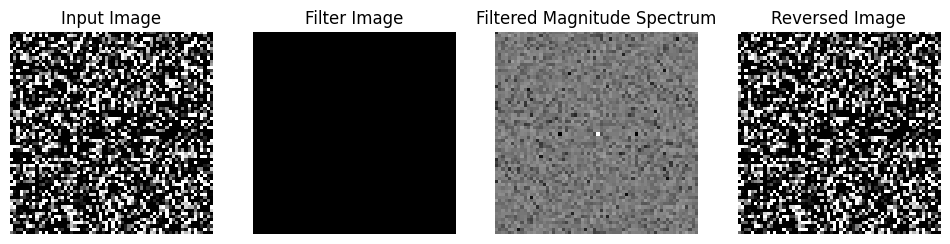

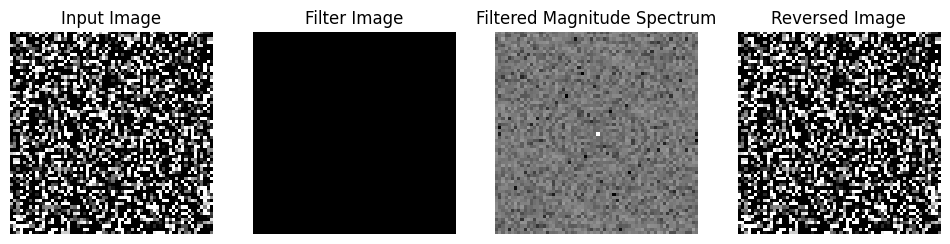

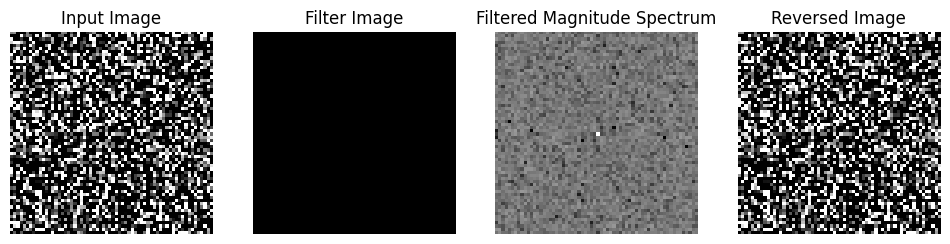

(64, 64, 3) (3, 64, 64)
(64, 128, 3)


In [1]:

from PIL import Image
from PIL import ImageDraw
import numpy as np
from matplotlib import pyplot as plt
import cv2


def main():
    # 画像を読み込む
    # img = Image.open('/home/tf63/project/nerf/diffusion/tutorial/Diffusion-Models-pytorch_simple/data/cifar10_64/cifar10-64/train/class0/img165.png')
    # グレイスケールに変換する
    # gray_img = img.convert('L')
    # NumPy 配列にする
    # f_xy = np.asarray(gray_img)

    # img = cv2.imread('data/cifar10_64/cifar10-64/train/class0/img165.png')
    img = cv2.imread('noise.png')
    img = img.transpose(2, 0, 1)
    out = img.copy()

    for i in range(img.shape[0]):
        f_xy = img[i]

        # 2 次元高速フーリエ変換で周波数領域の情報を取り出す
        f_uv = np.fft.fft2(f_xy)
        # 画像の中心に低周波数の成分がくるように並べかえる
        shifted_f_uv = np.fft.fftshift(f_uv)

        # フィルタ (ローパス) を用意する
        x_pass_filter = Image.new(mode='L',  # 8-bit pixels, black and white
                                size=(shifted_f_uv.shape[0],
                                        shifted_f_uv.shape[1]),
                                color=0,  # default black
                                )
        # 中心に円を描く
        draw = ImageDraw.Draw(x_pass_filter)
        # 円の半径
        ellipse_r = 64
        # 画像の中心
        center = (shifted_f_uv.shape[0] // 2,
                shifted_f_uv.shape[1] // 2)
        # 円の座標
        ellipse_pos = (center[0] - ellipse_r,
                    center[1] - ellipse_r,
                    center[0] + ellipse_r,
                    center[1] + ellipse_r)
        draw.ellipse(ellipse_pos, fill=255)
        # フィルタ
        filter_array = np.asarray(x_pass_filter)

        # フィルタを適用する
        filtered_f_uv = np.multiply(shifted_f_uv, filter_array)

        # パワースペクトルに変換する
        magnitude_spectrum2d = 20 * np.log(np.absolute(filtered_f_uv))

        # 元の並びに直す
        unshifted_f_uv = np.fft.fftshift(filtered_f_uv)
        # 2 次元逆高速フーリエ変換で空間領域の情報に戻す
        i_f_xy = np.fft.ifft2(unshifted_f_uv).real  # 実数部だけ使う

        # 上記を画像として可視化する
        fig, axes = plt.subplots(1, 4, figsize=(12, 4))
        # 枠線と目盛りを消す
        for ax in axes:
            for spine in ax.spines.values():
                spine.set_visible(False)
            ax.set_xticks([])
            ax.set_yticks([])
        # 元画像
        axes[0].imshow(f_xy, cmap='gray')
        axes[0].set_title('Input Image')
        # フィルタ画像
        axes[1].imshow(filter_array, cmap='gray')
        axes[1].set_title('Filter Image')
        # フィルタされた周波数領域のパワースペクトル
        axes[2].imshow(magnitude_spectrum2d, cmap='gray')
        axes[2].set_title('Filtered Magnitude Spectrum')
        # FFT -> Band-pass Filter -> IFFT した画像
        axes[3].imshow(i_f_xy, cmap='gray')
        axes[3].set_title('Reversed Image')
        # グラフを表示する
        plt.show()

        out[i] = ((i_f_xy / i_f_xy.max()) * 255).astype(np.uint8)

    out = out.transpose(1, 2, 0)
    print(out.shape, img.shape)
    
    out = np.concatenate([img.transpose(1, 2, 0), out], axis=1)
    print(out.shape)
    cv2.imwrite('a.png', out)

if __name__ == '__main__':
    main()


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


/tmp/ipykernel_21630/3124961168.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 4, figsize=(12, 4))


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


/tmp/ipykernel_21630/3124961168.py:63: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum2d = 20 * np.log(np.absolute(filtered_f_uv))


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


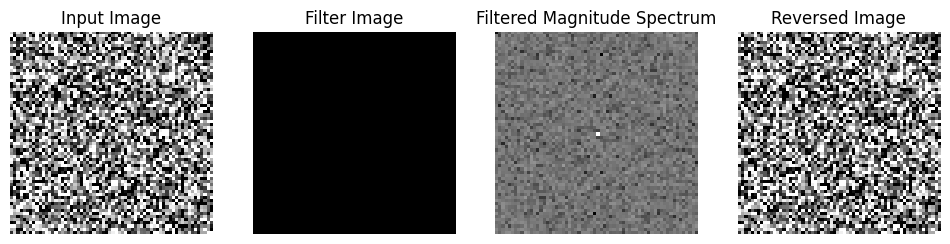

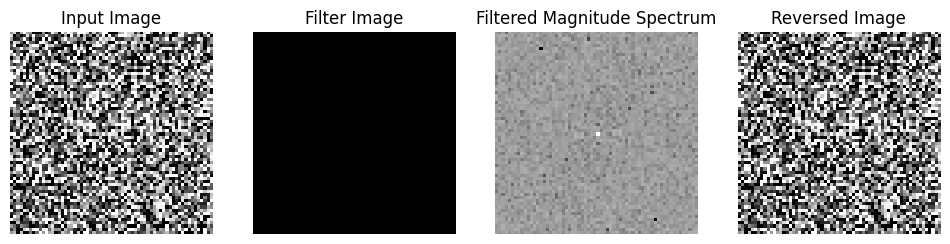

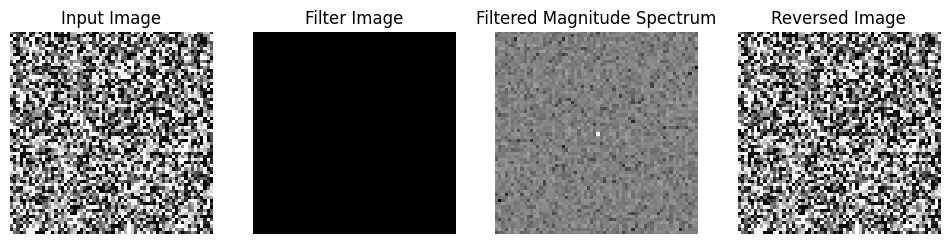

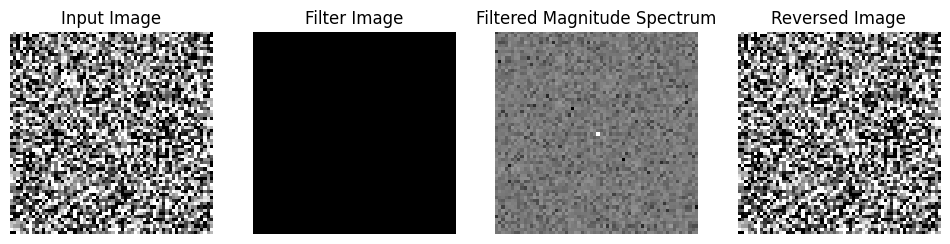

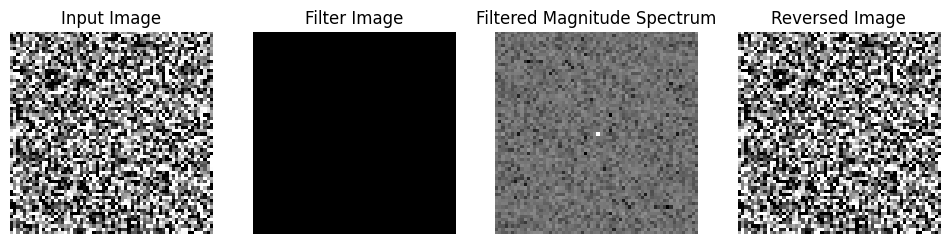

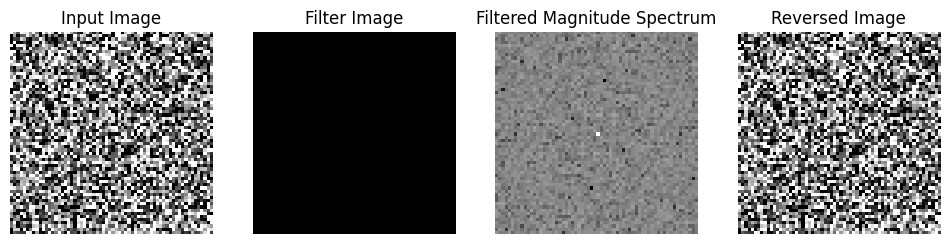

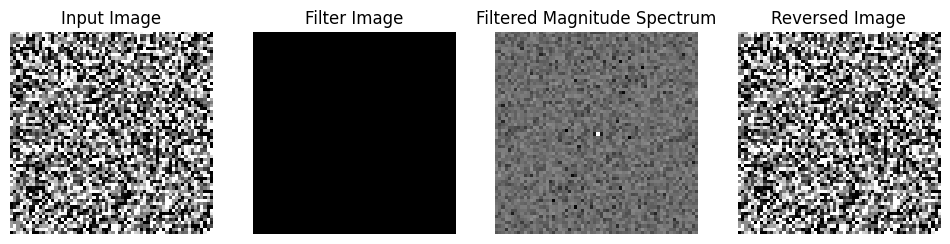

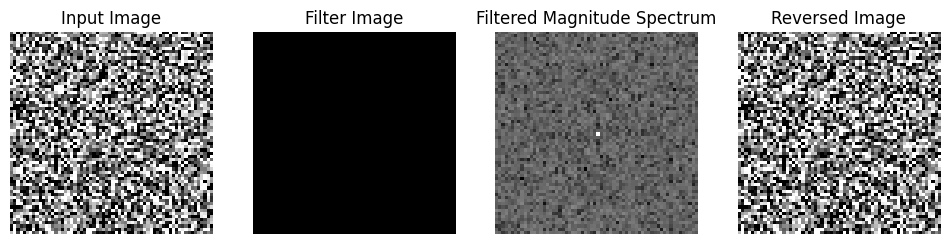

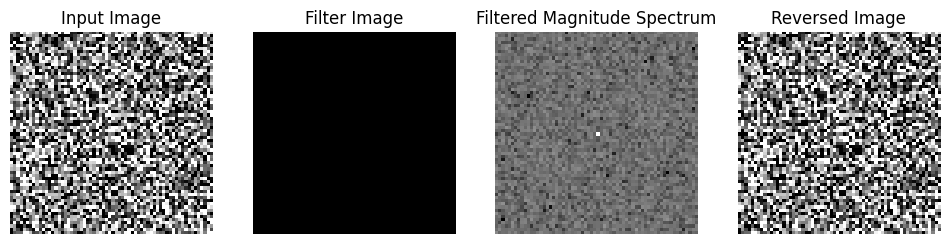

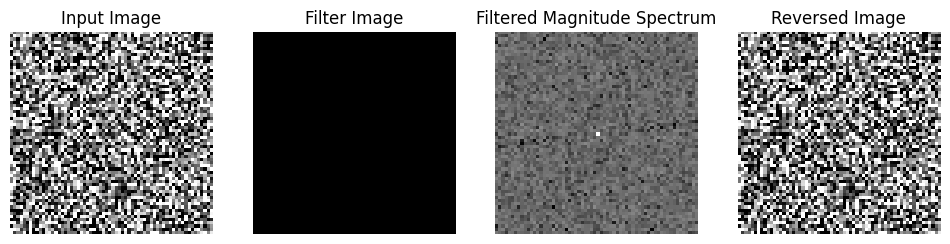

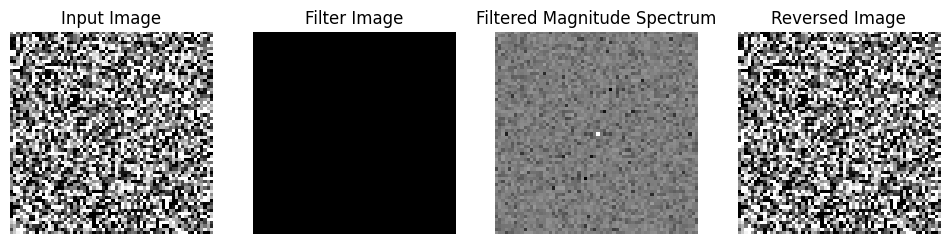

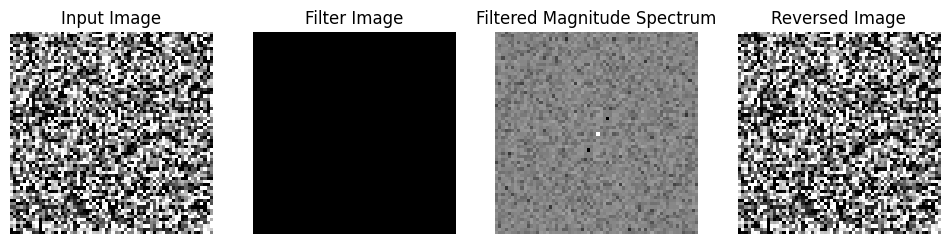

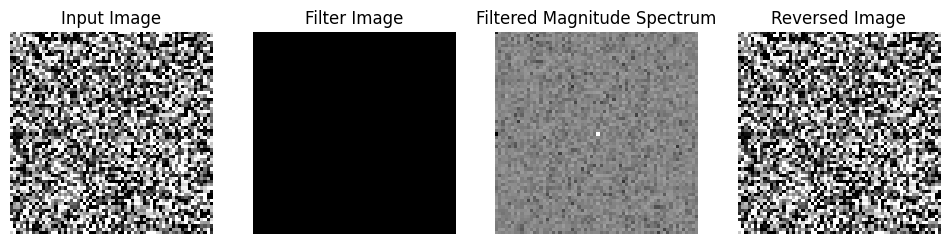

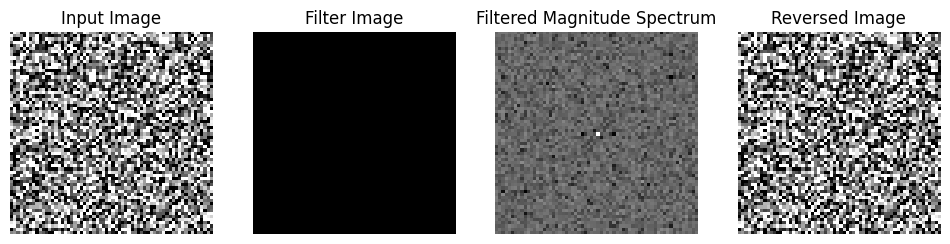

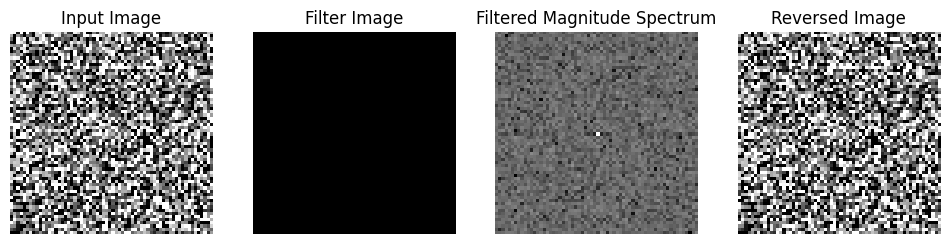

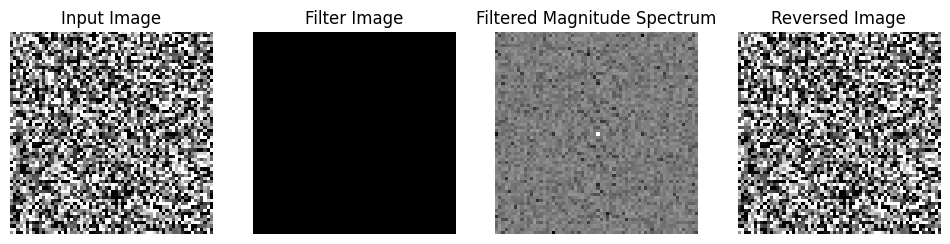

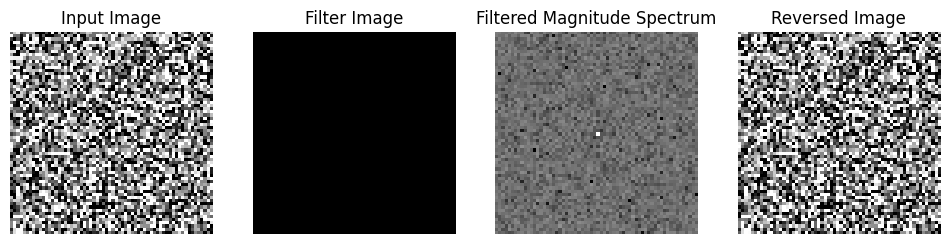

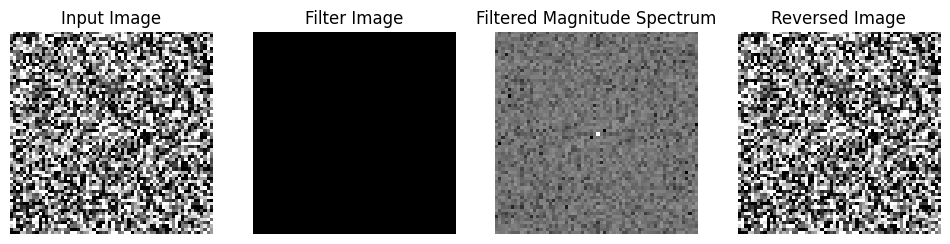

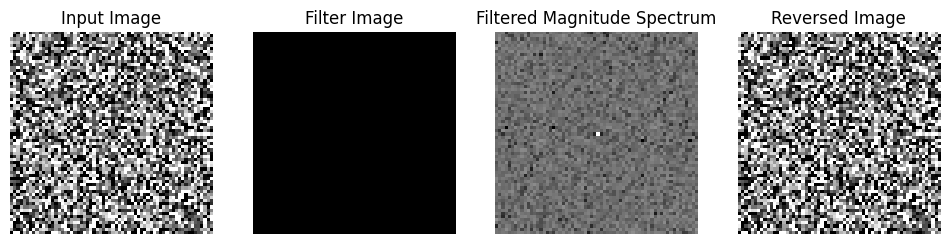

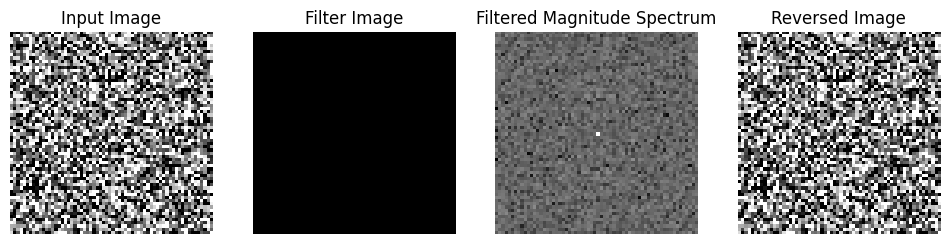

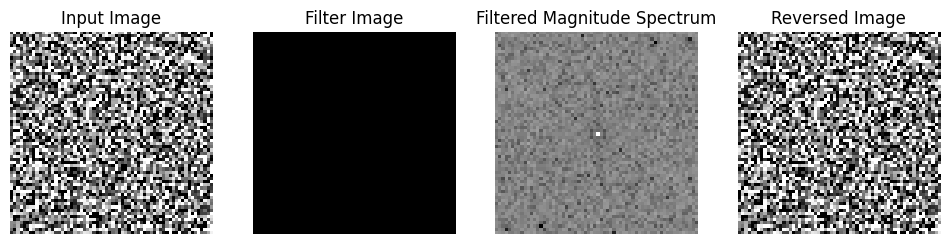

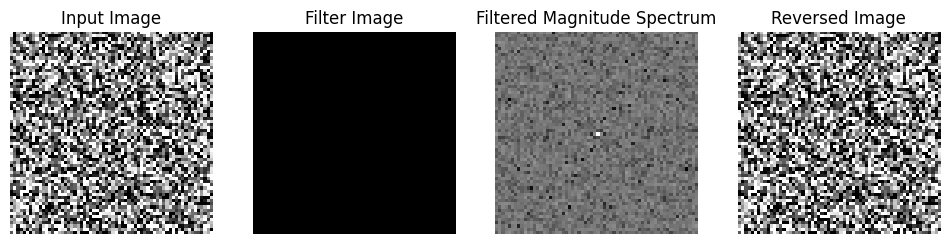

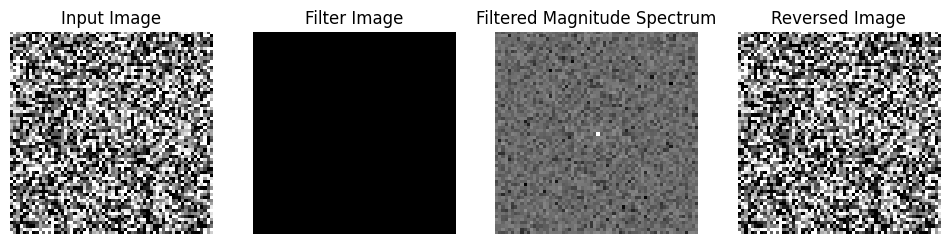

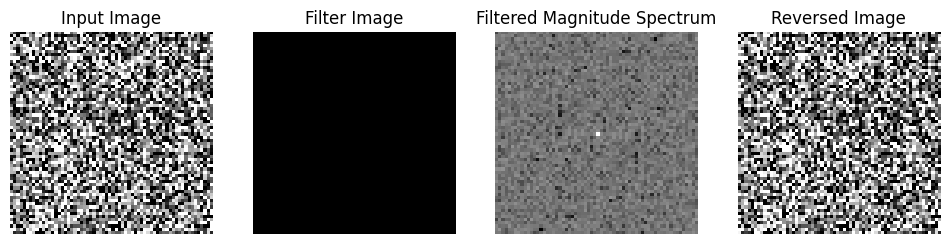

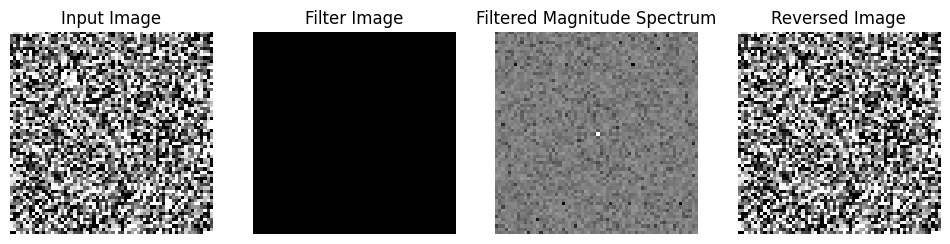

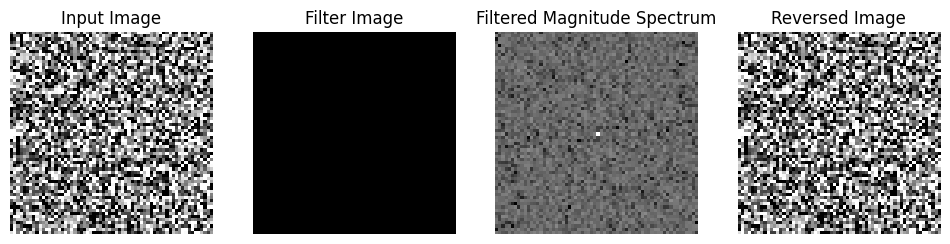

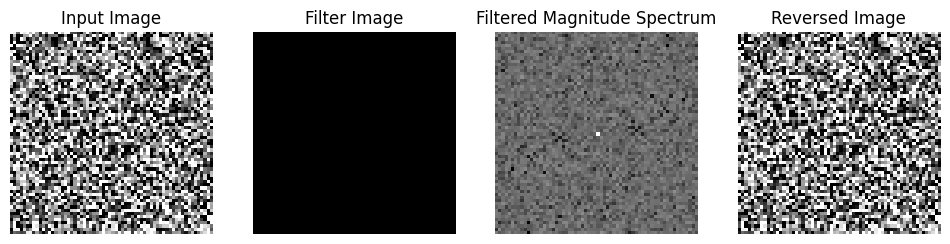

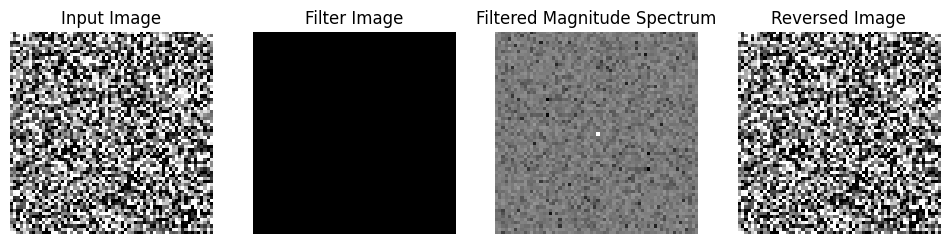

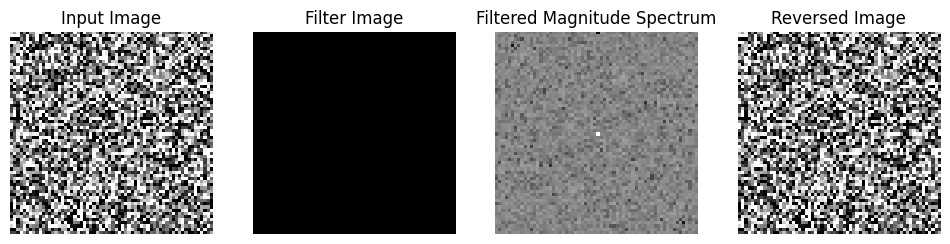

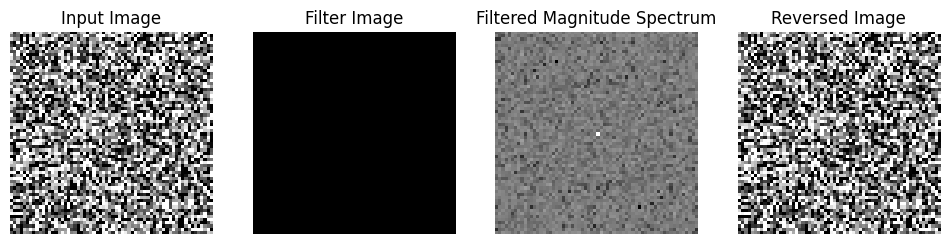

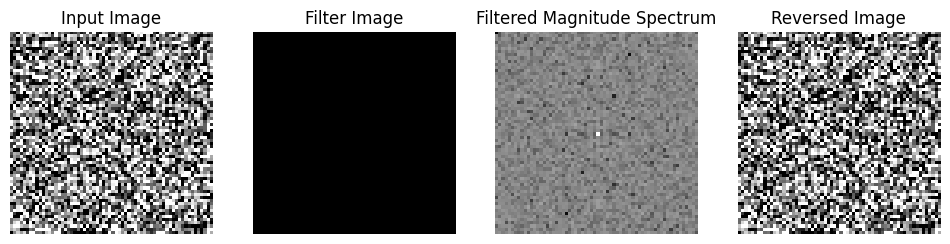

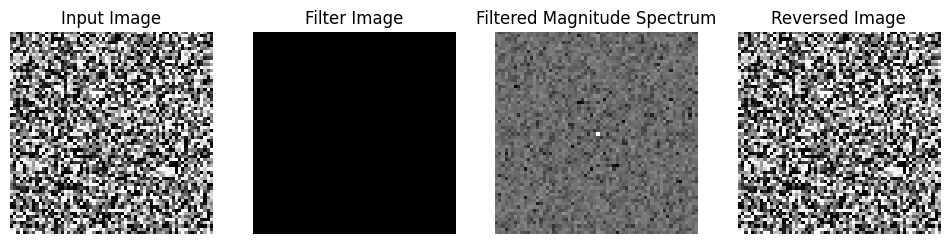

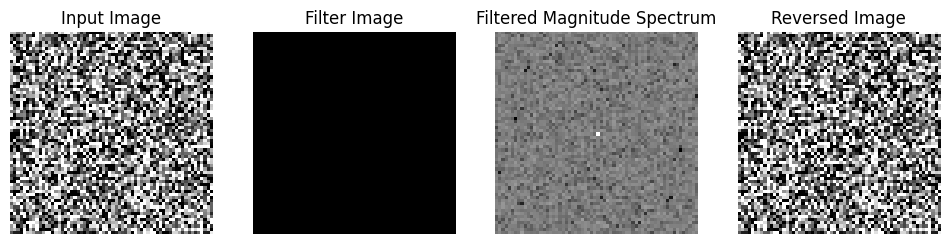

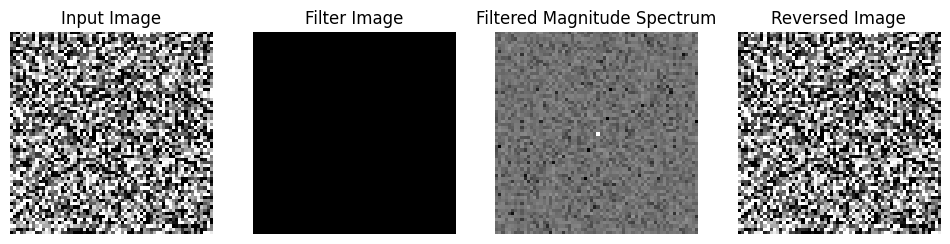

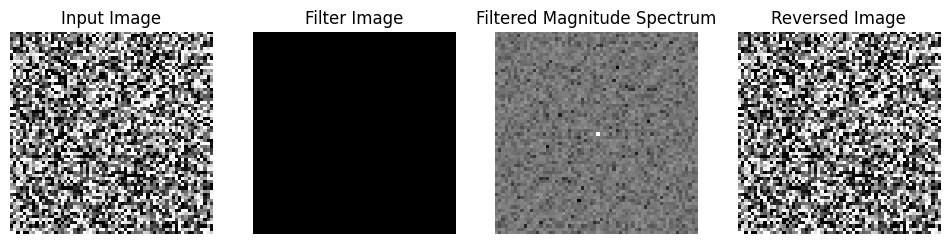

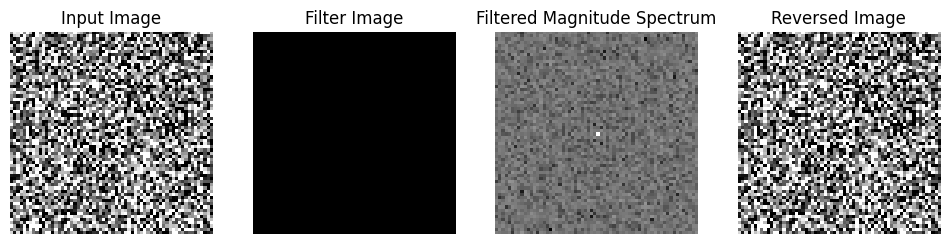

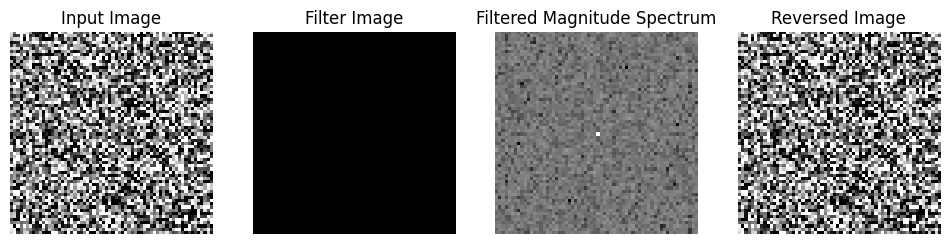

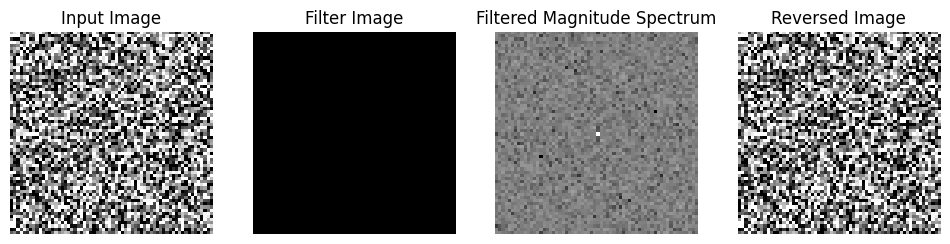

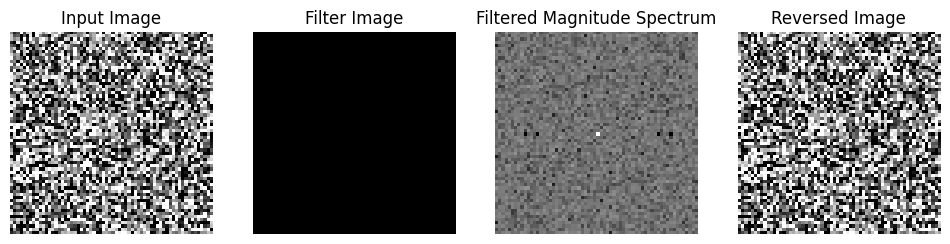

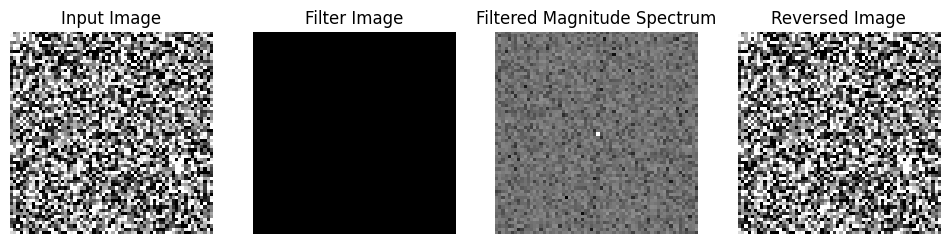

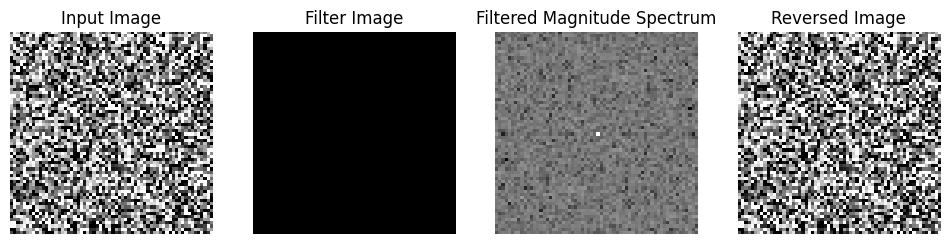

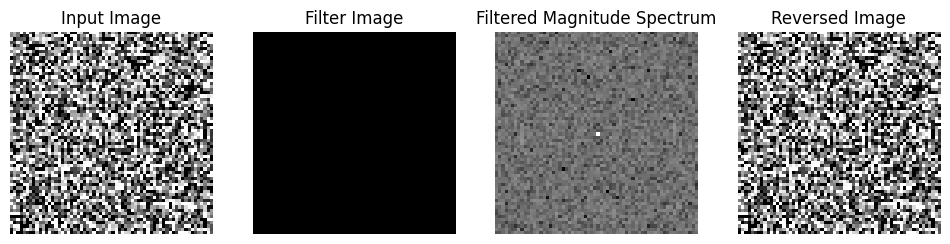

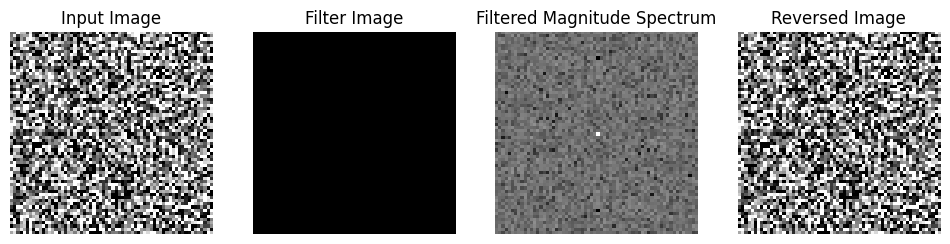

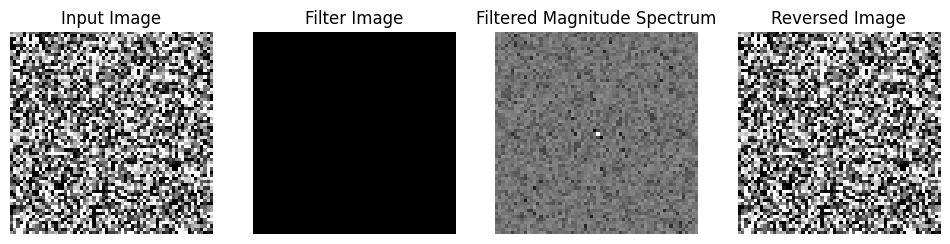

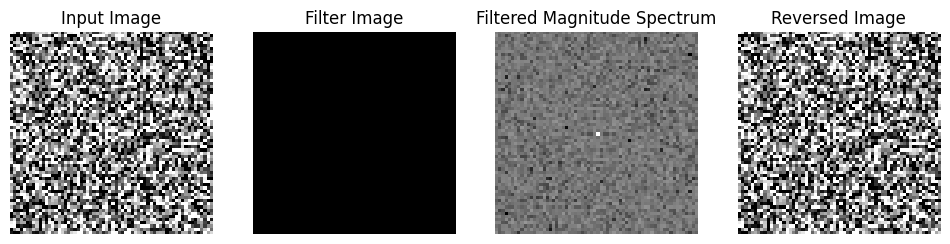

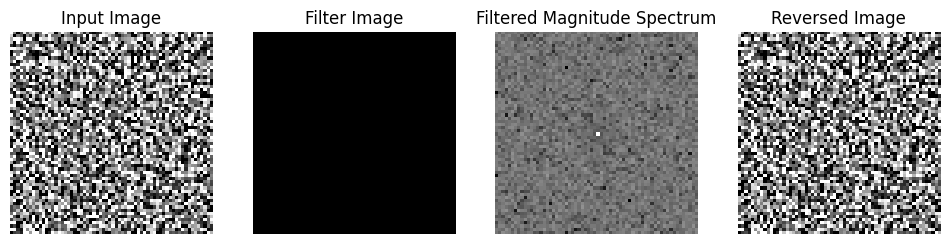

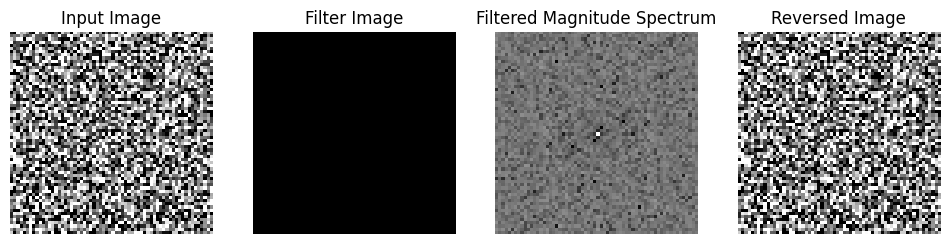

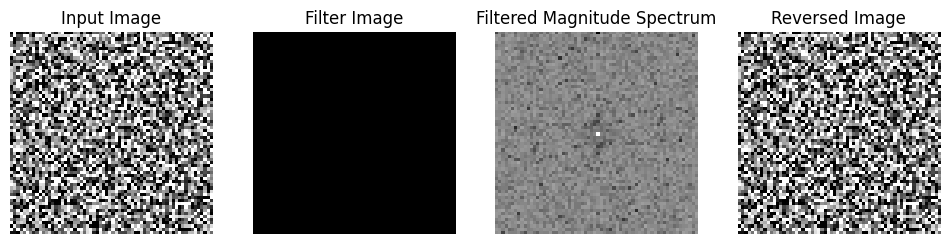

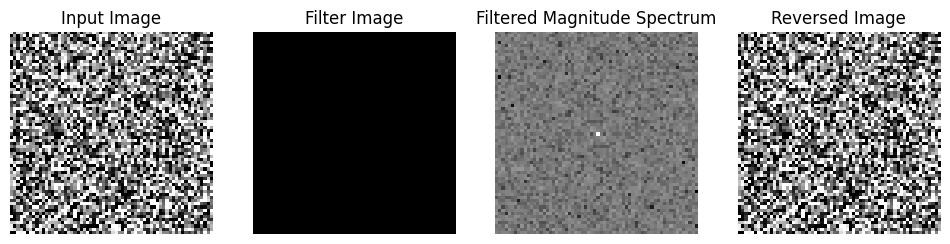

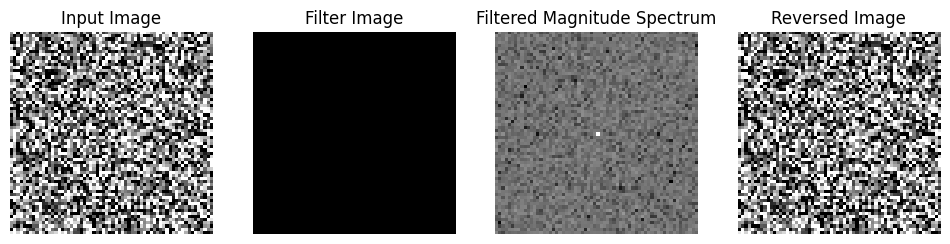

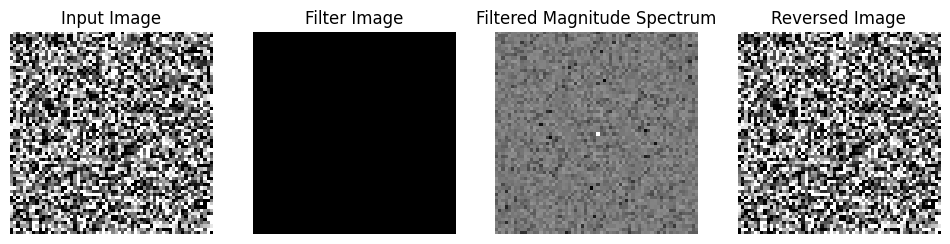

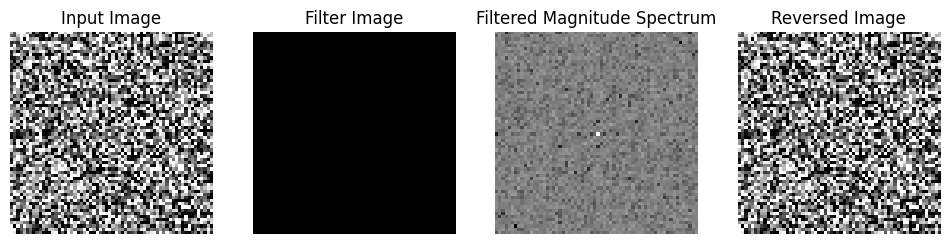

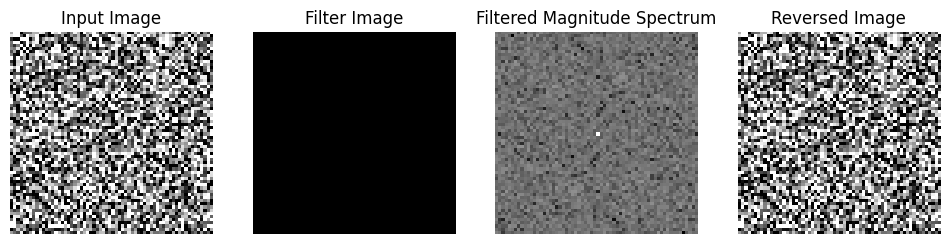

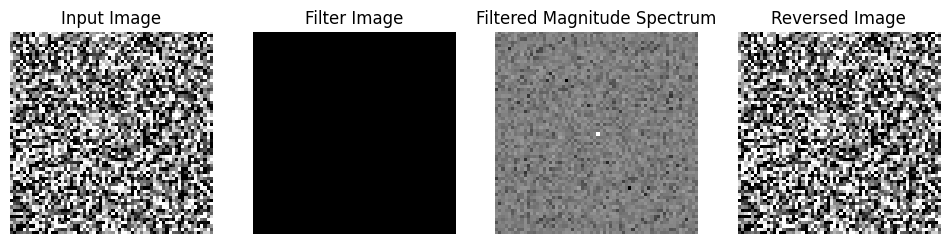

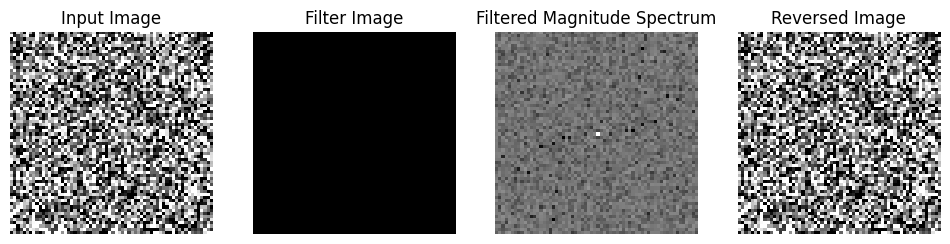

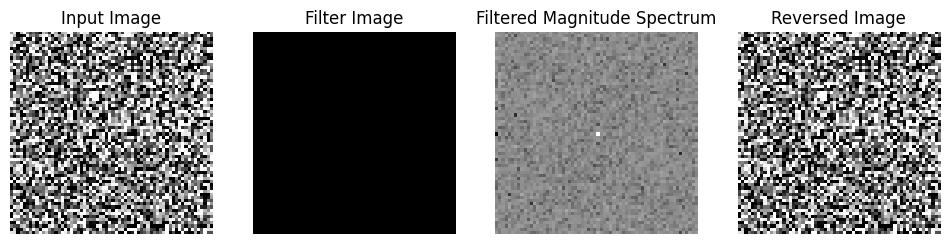

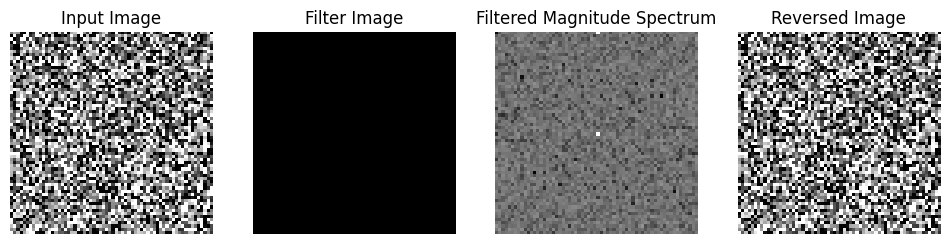

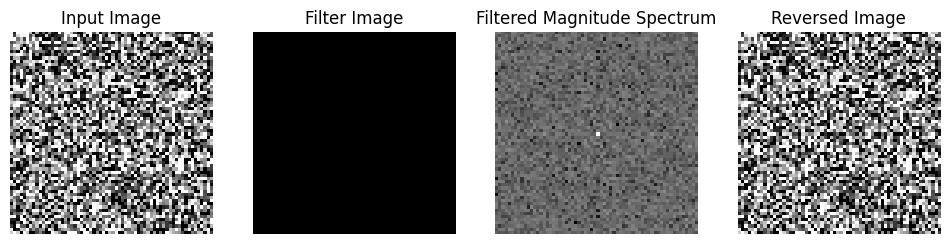

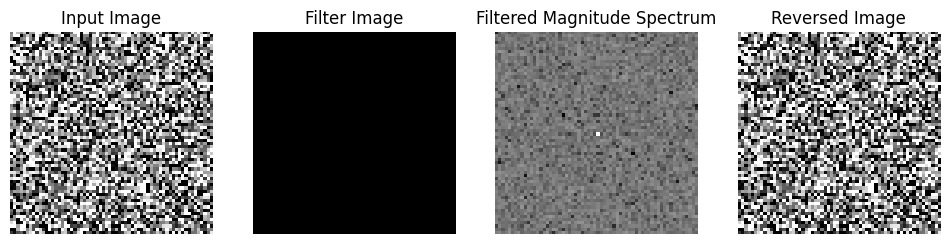

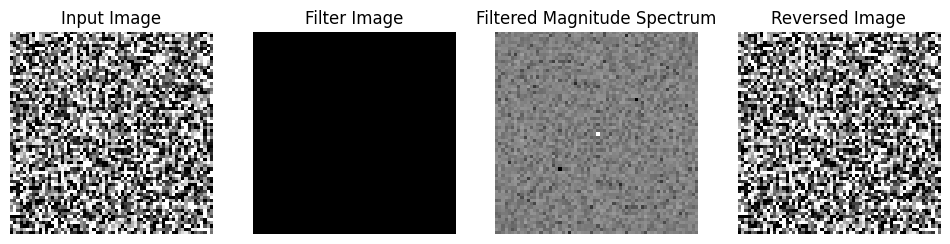

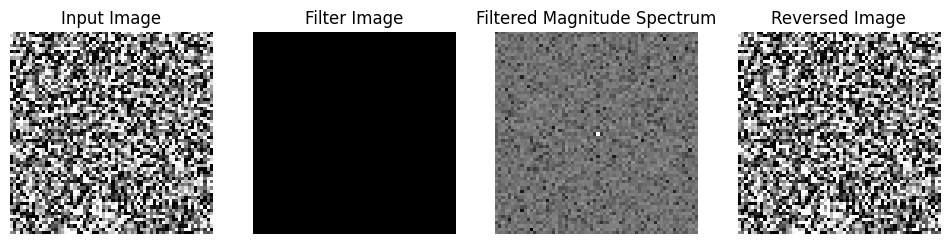

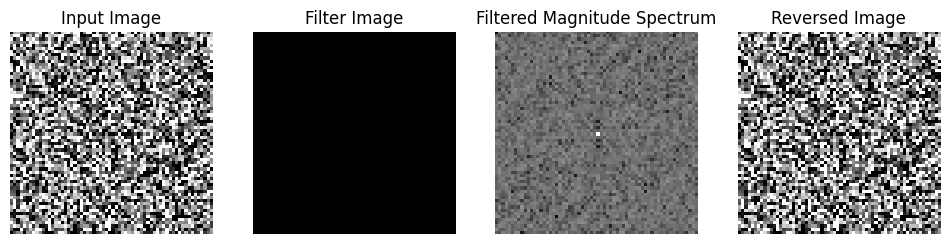

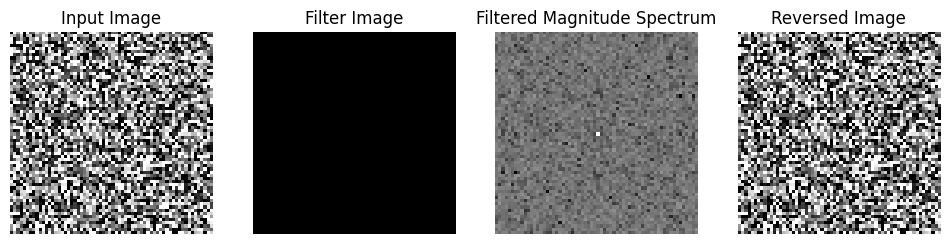

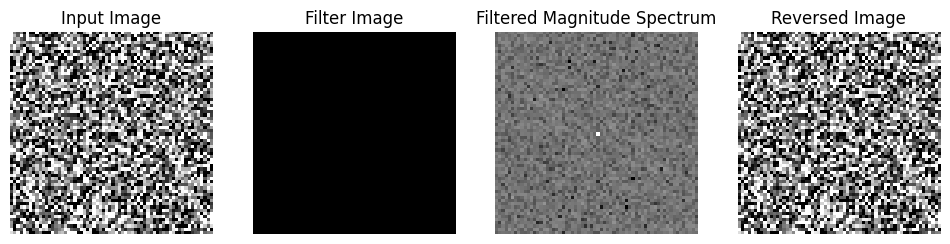

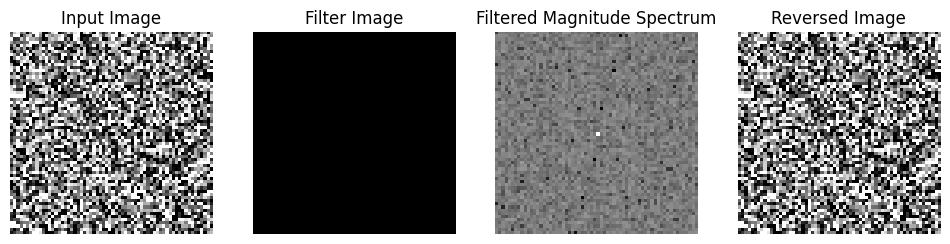

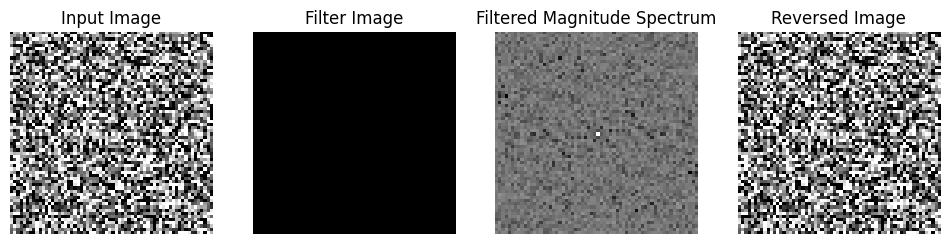

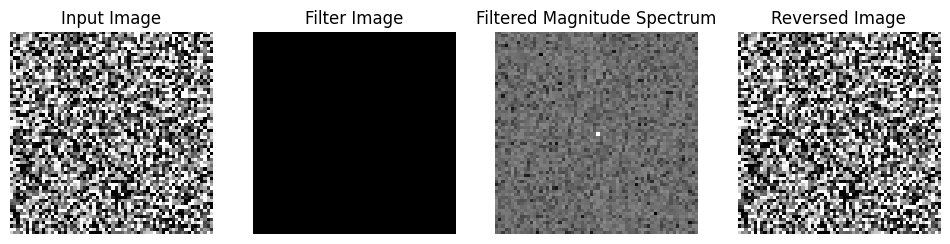

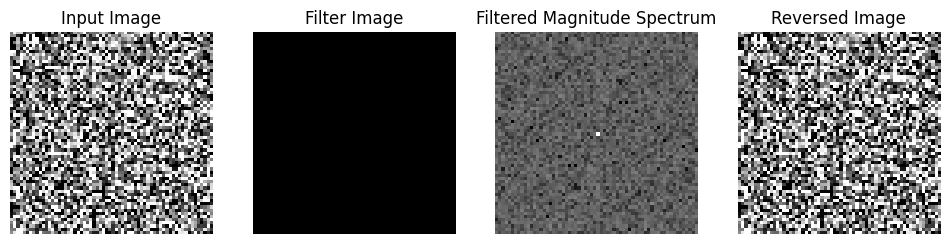

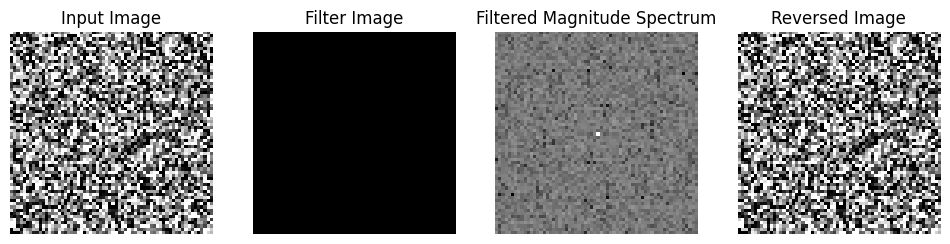

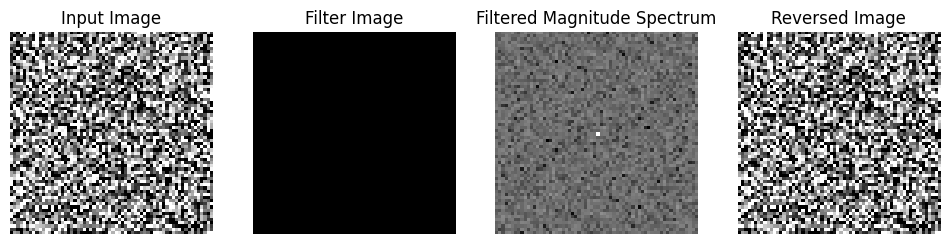

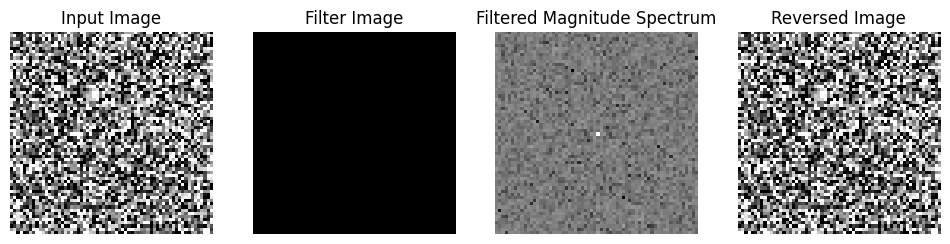

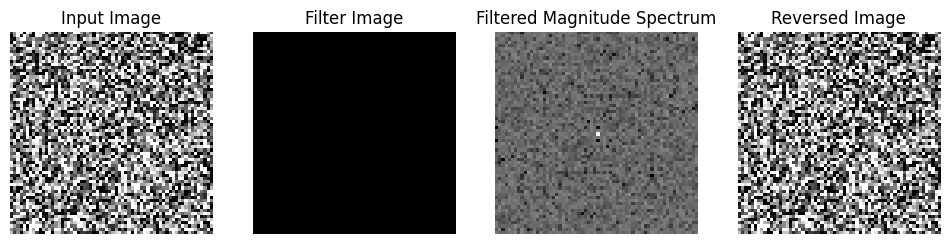

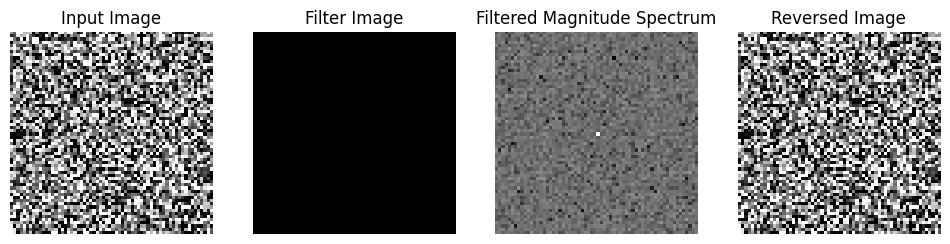

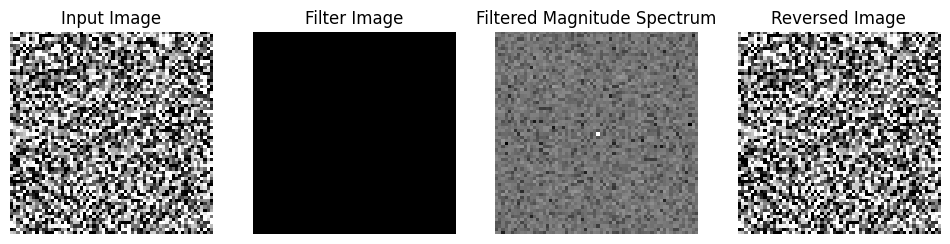

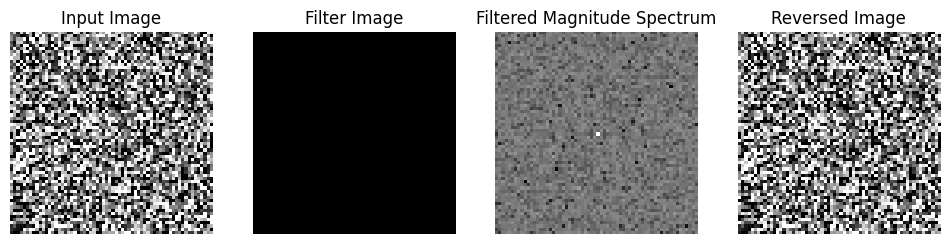

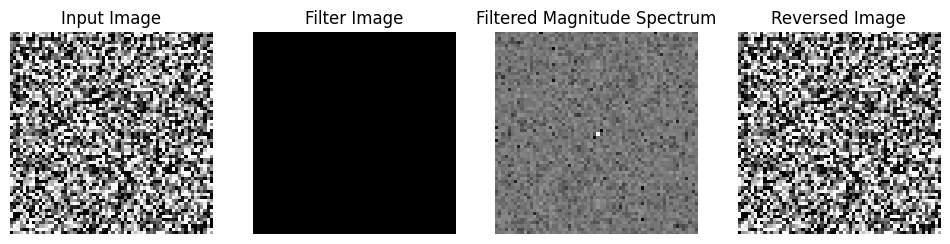

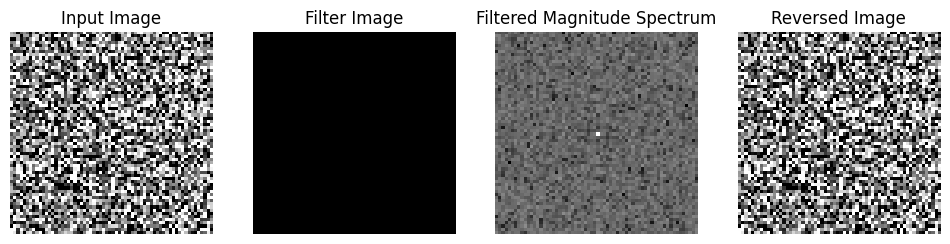

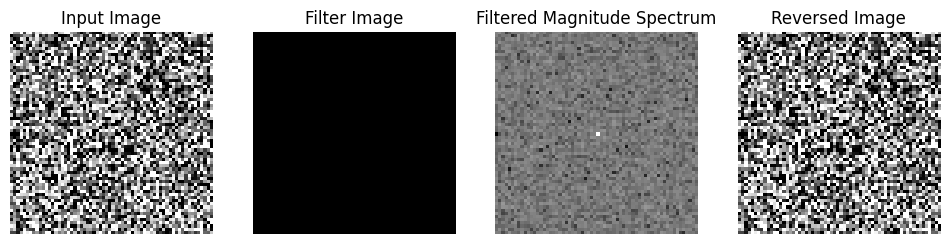

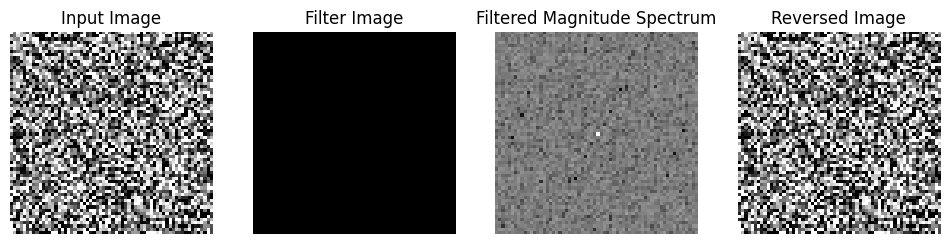

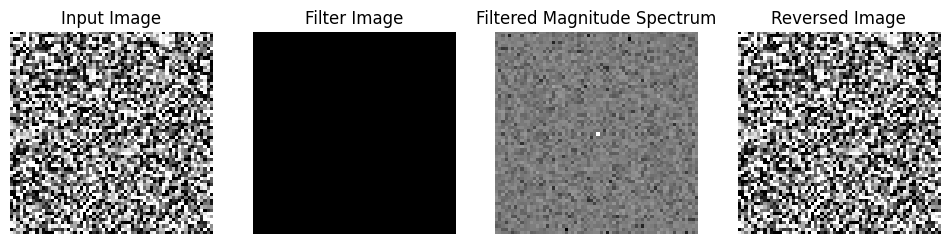

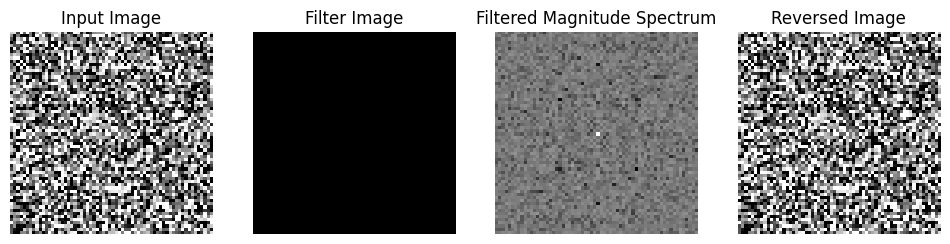

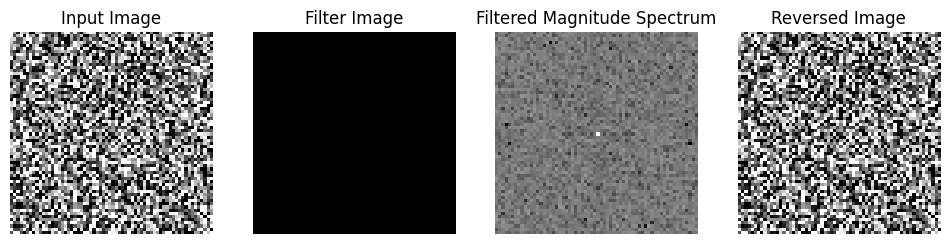

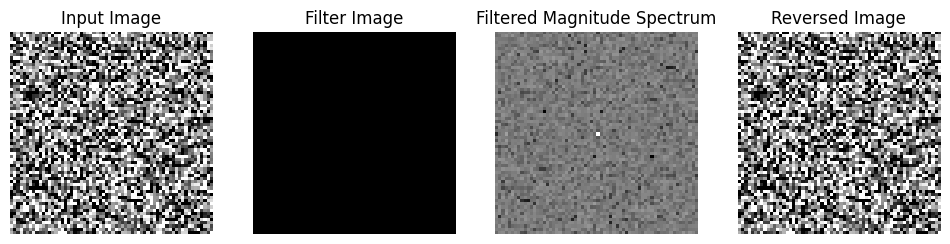

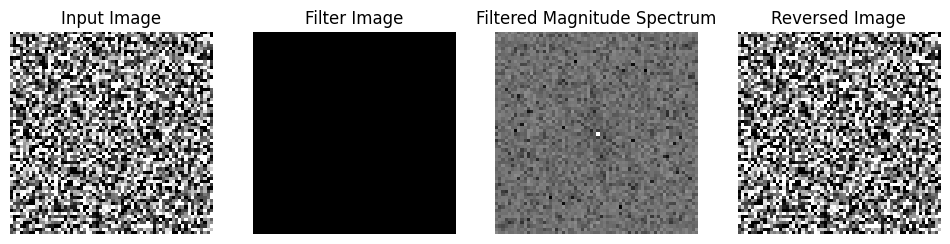

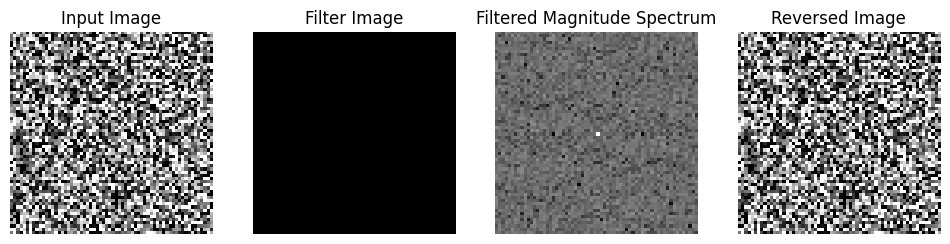

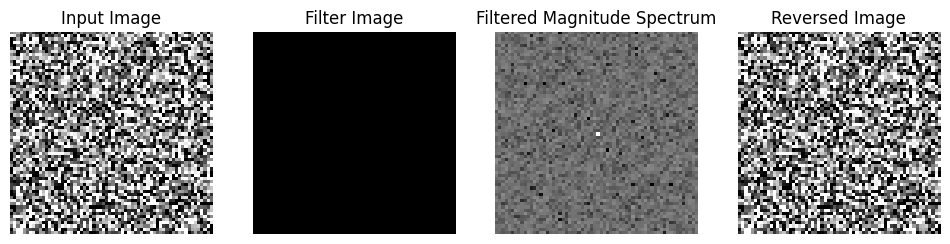

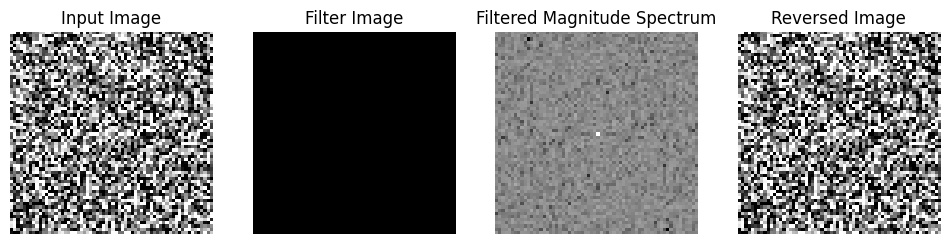

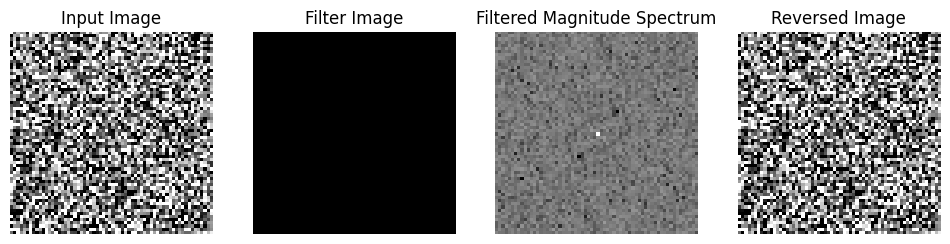

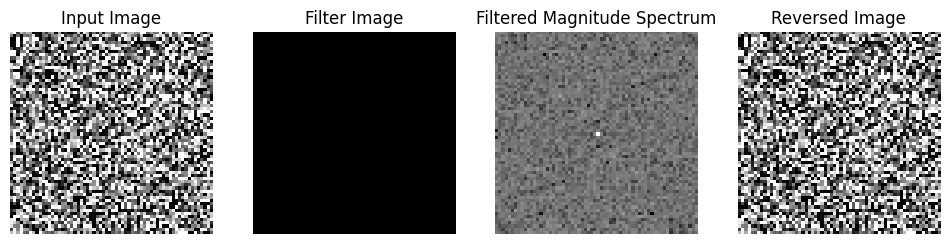

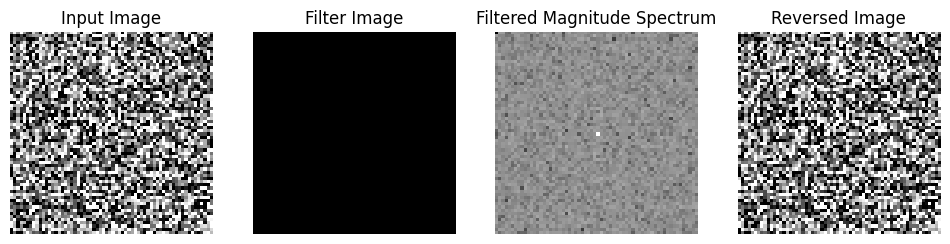

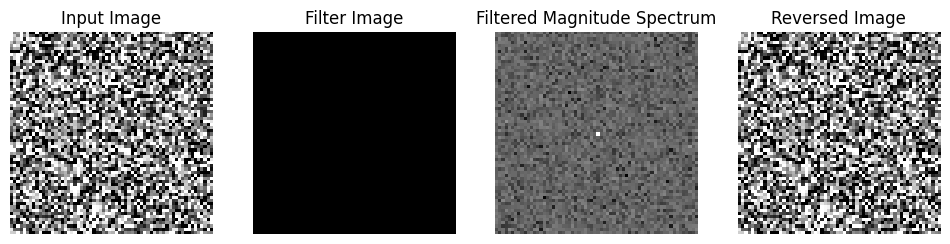

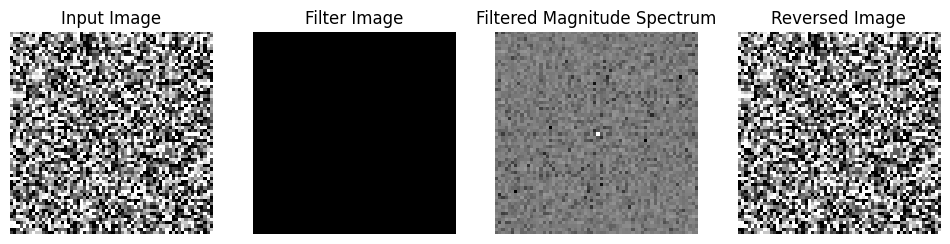

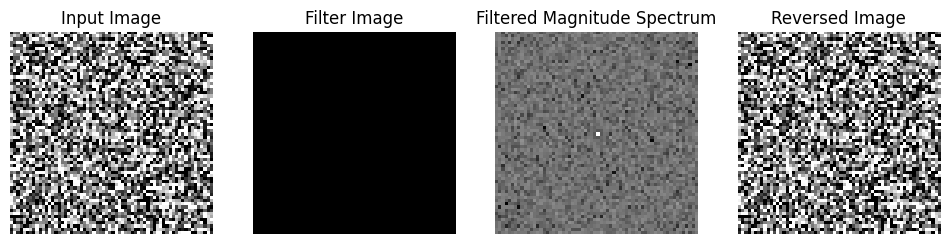

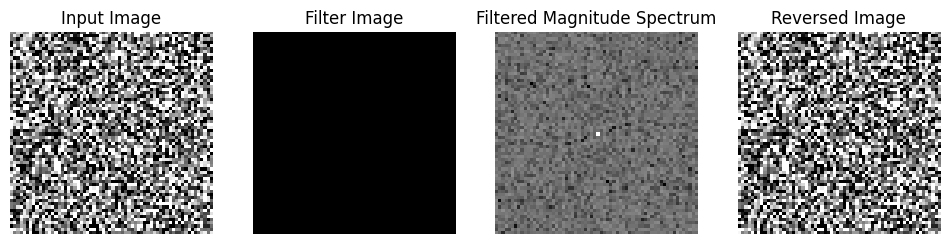

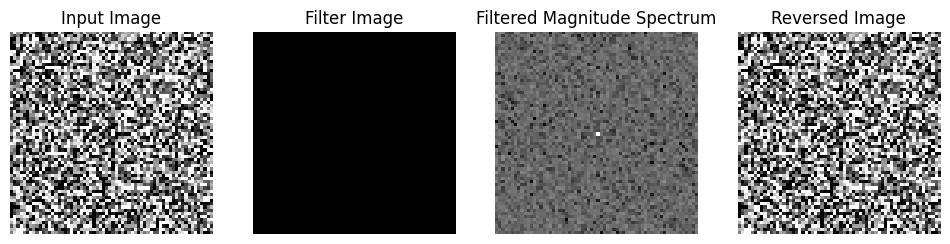

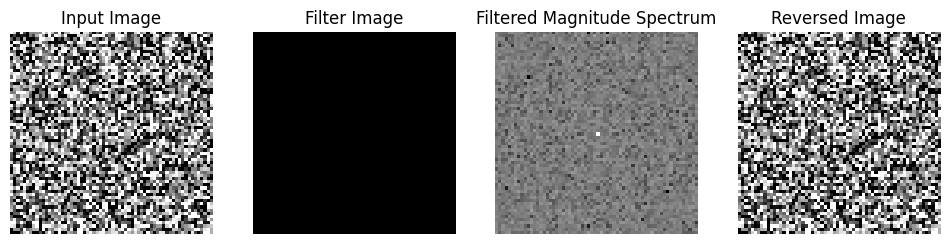

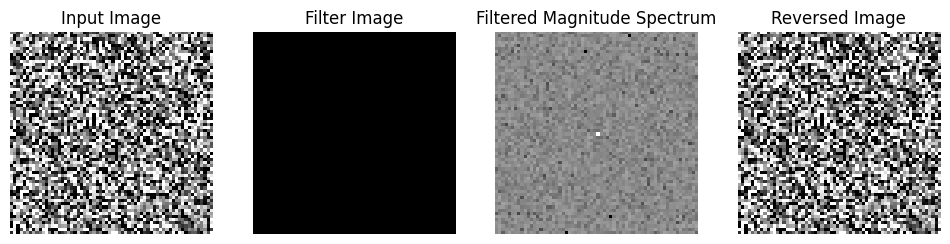

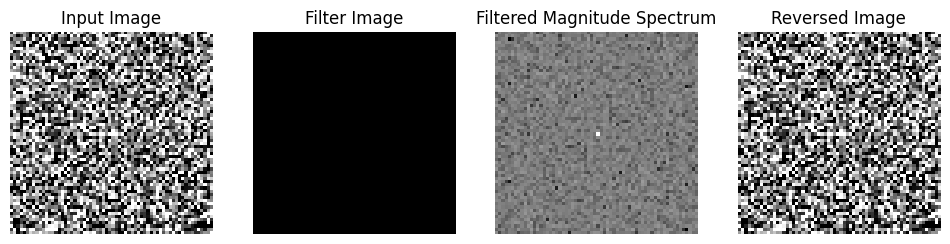

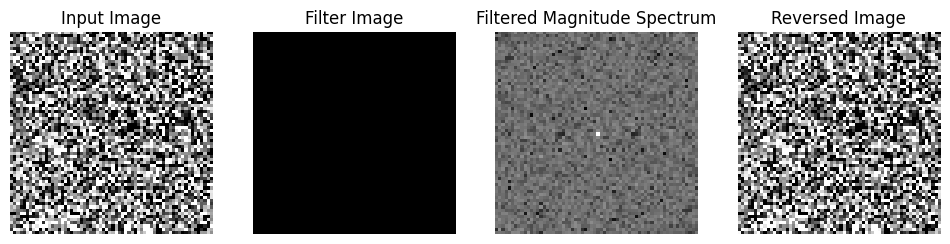

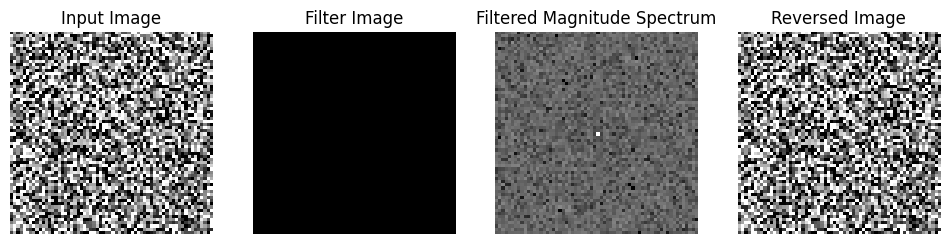

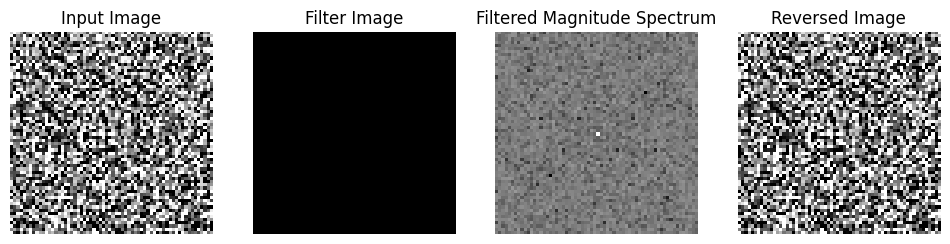

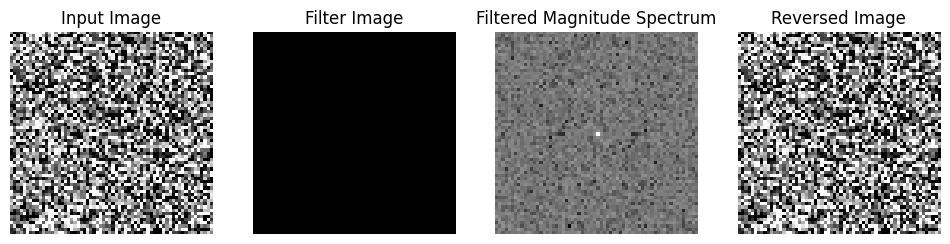

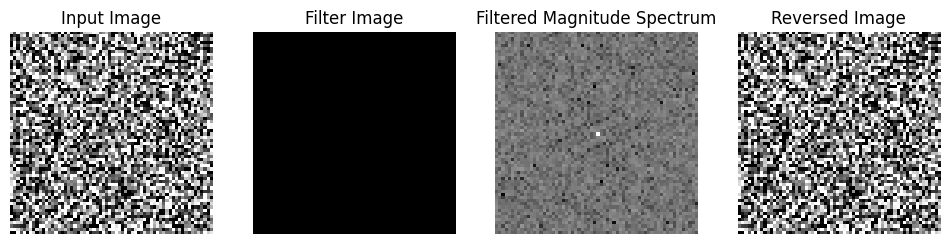

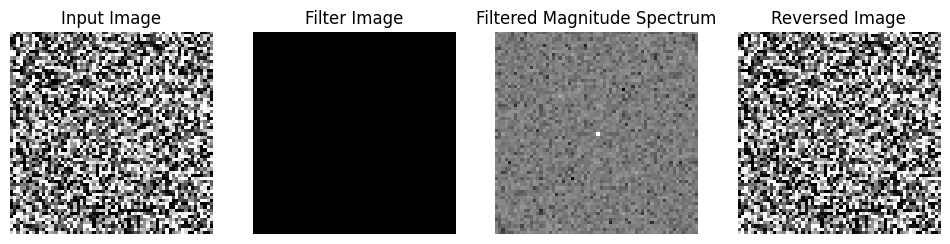

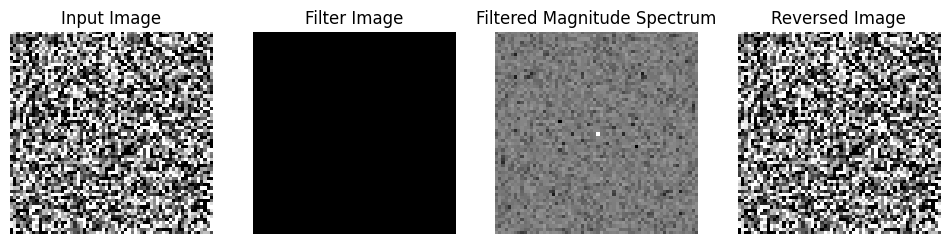

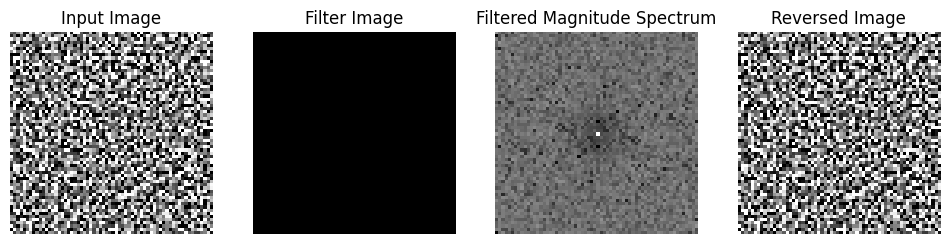

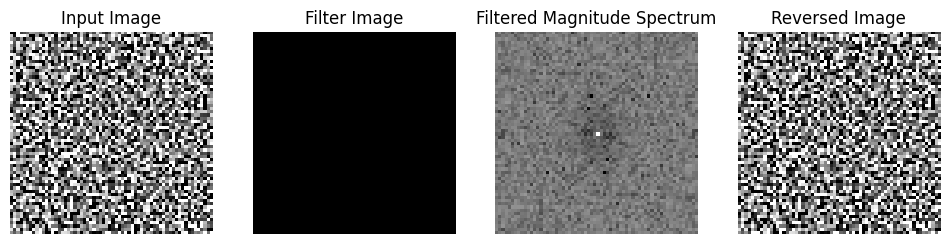

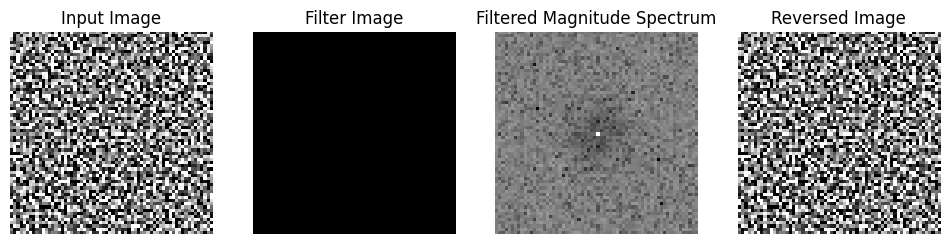

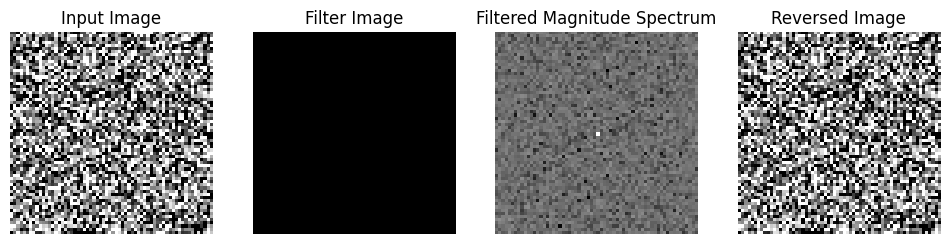

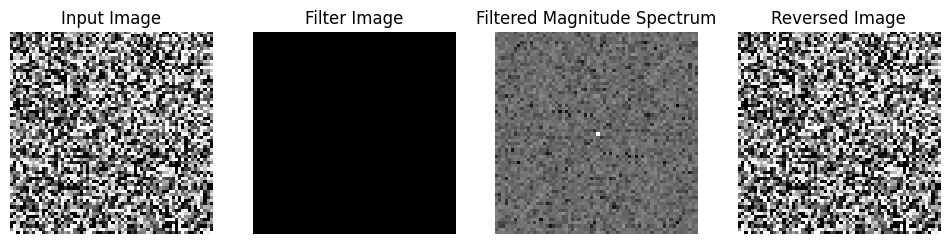

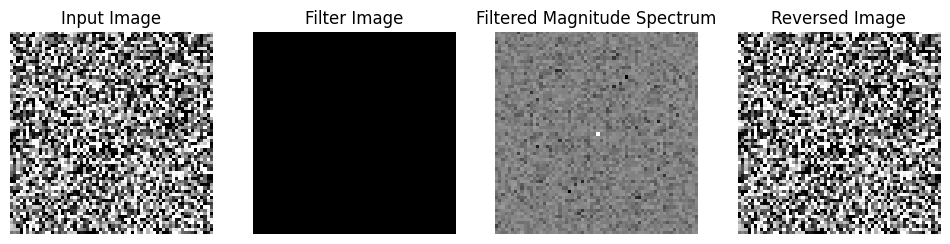

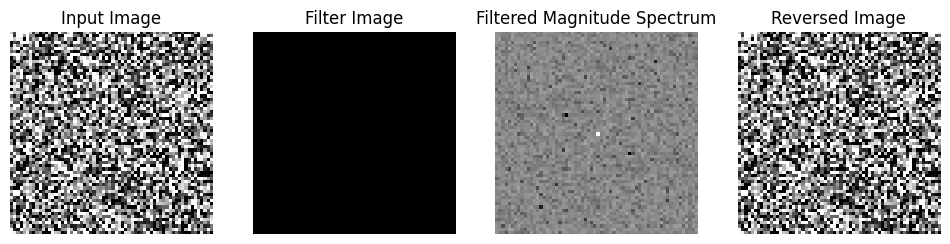

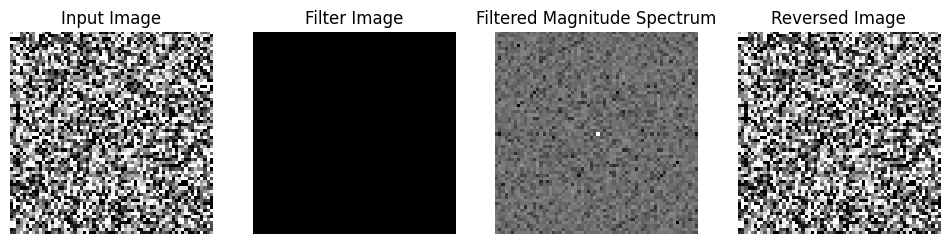

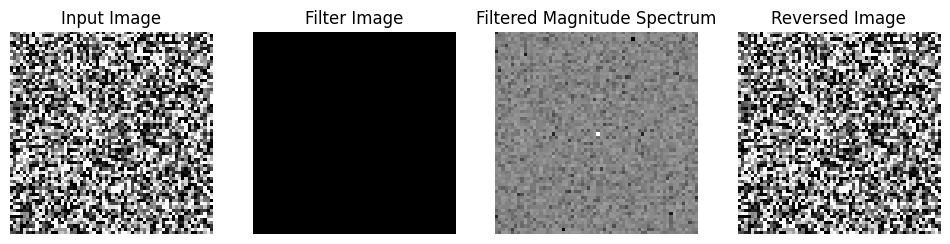

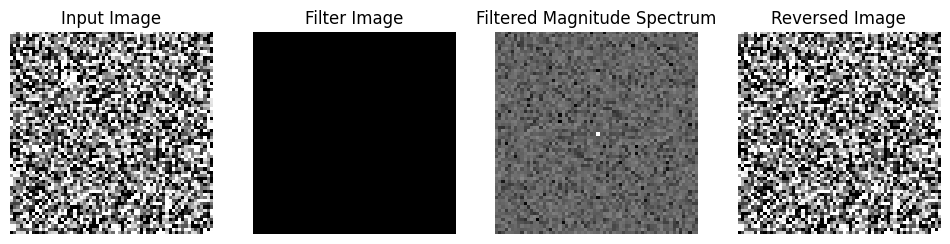

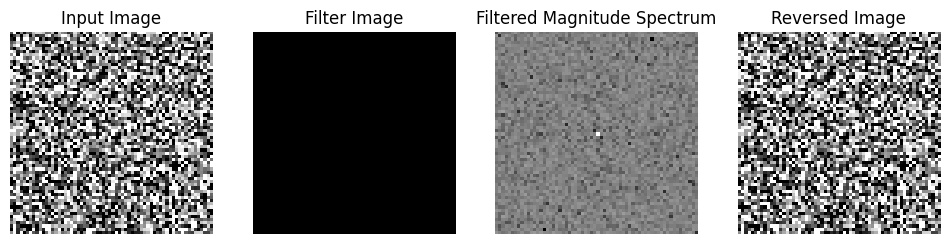

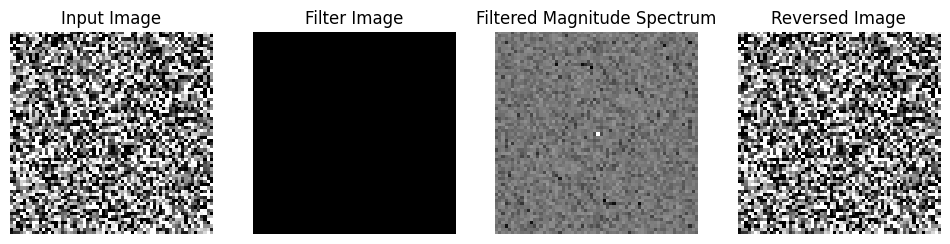

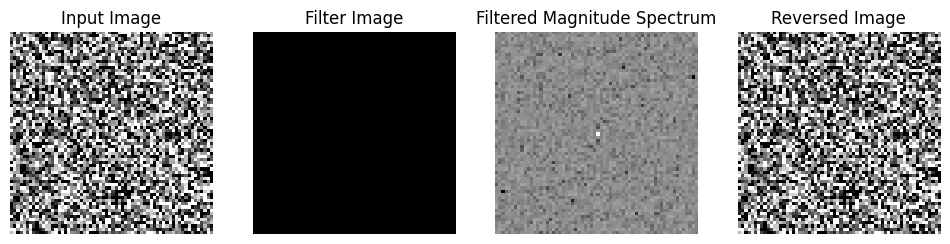

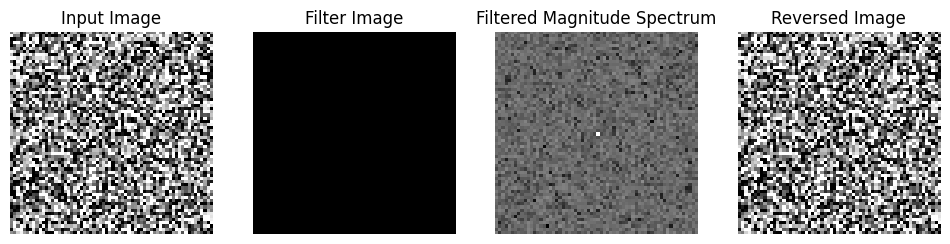

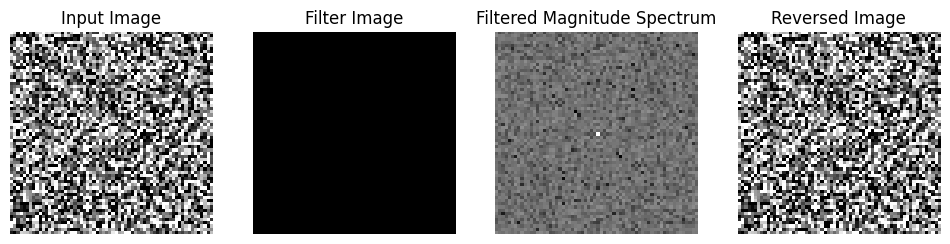

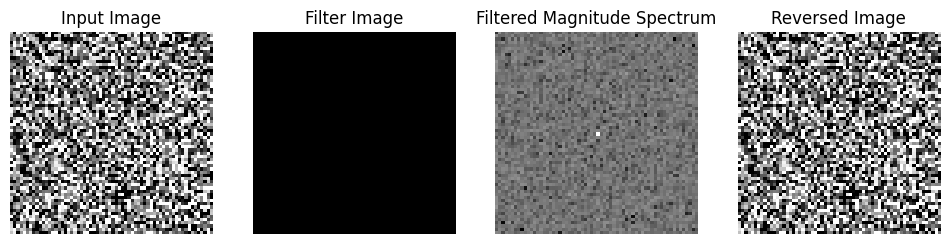

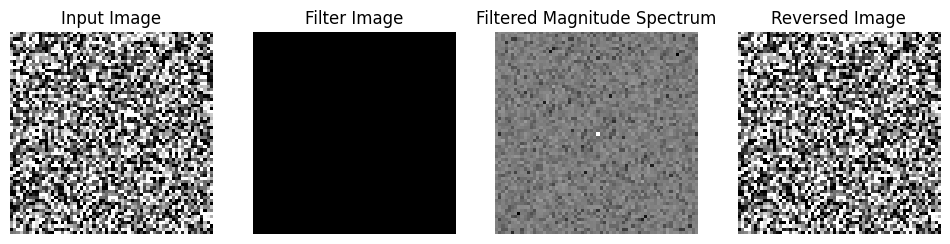

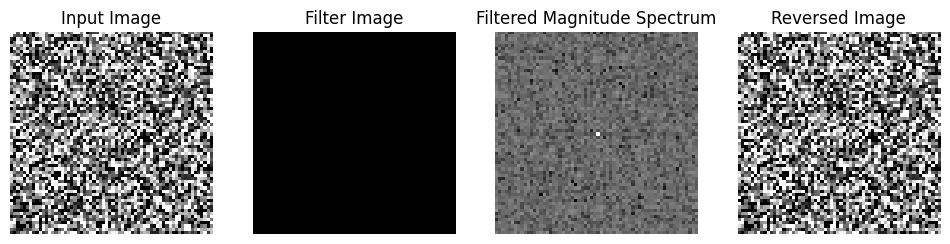

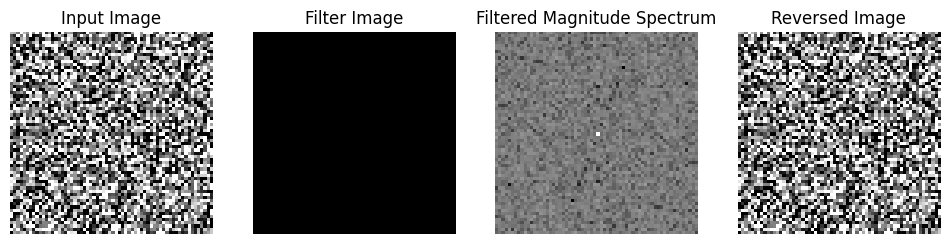

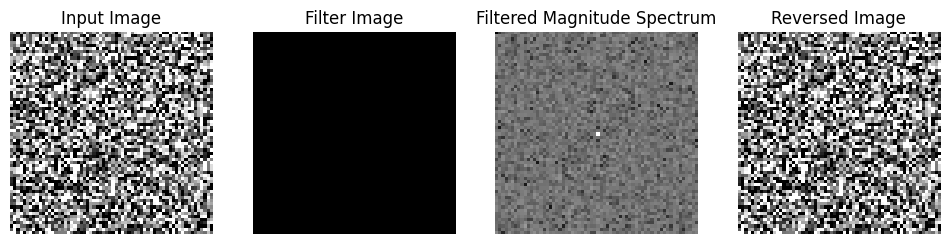

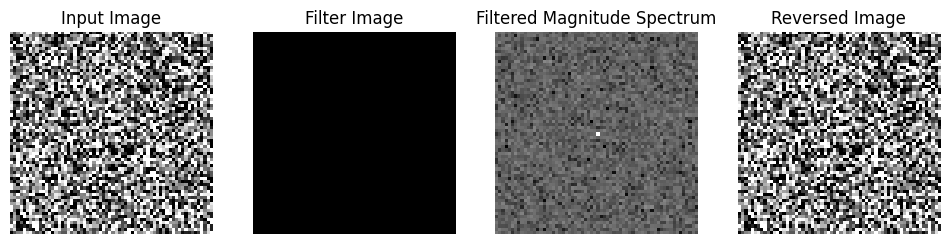

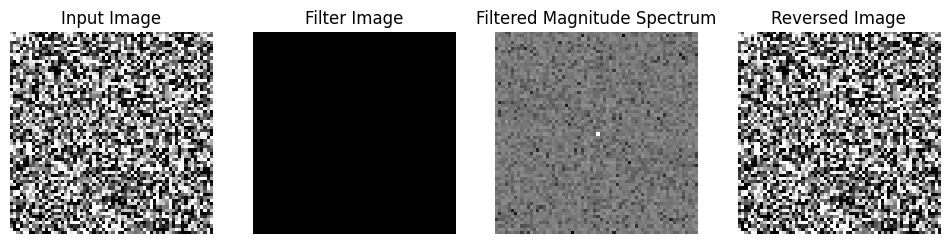

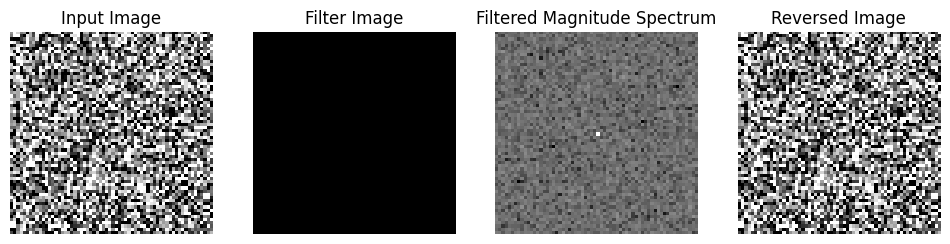

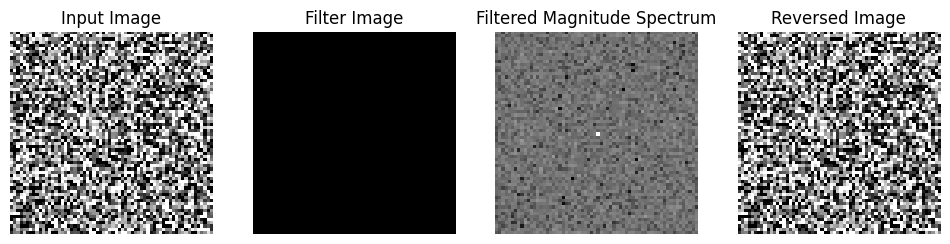

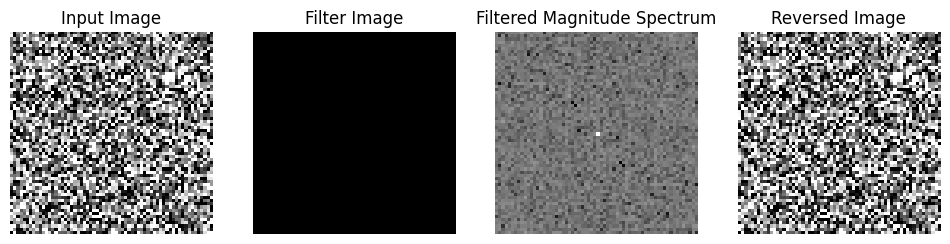

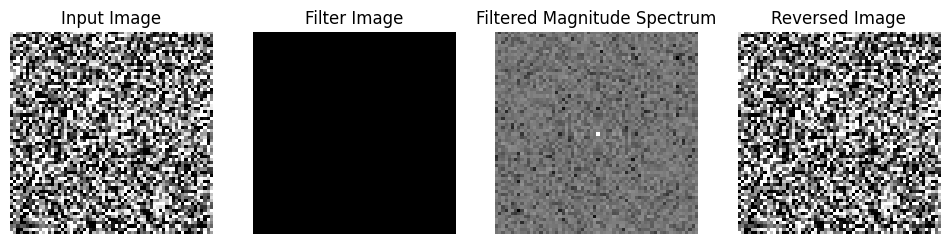

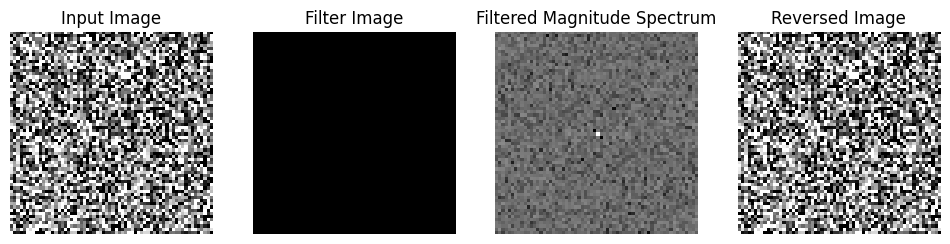

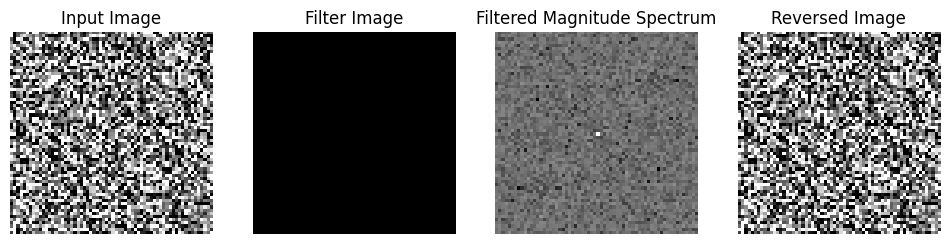

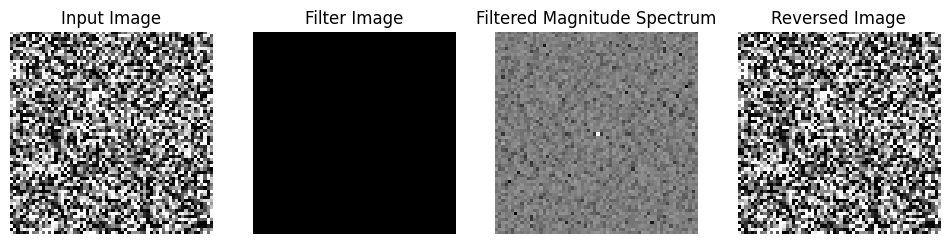

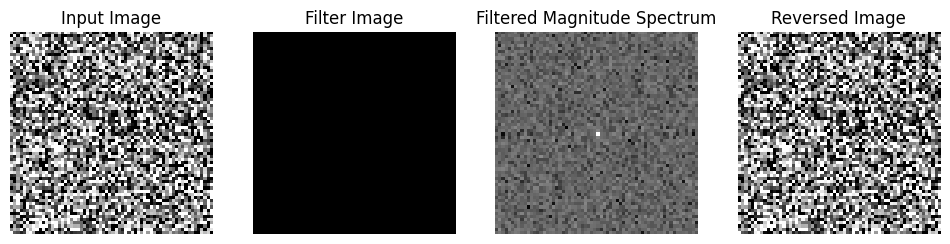

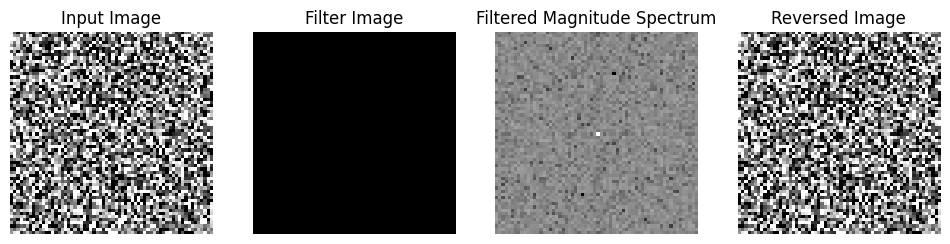

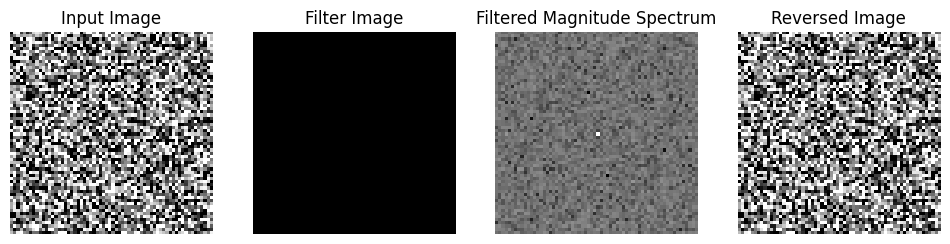

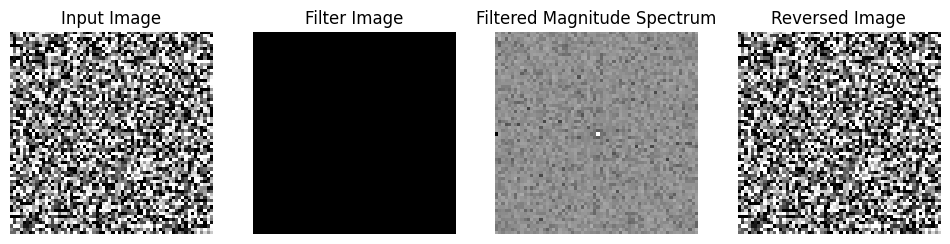

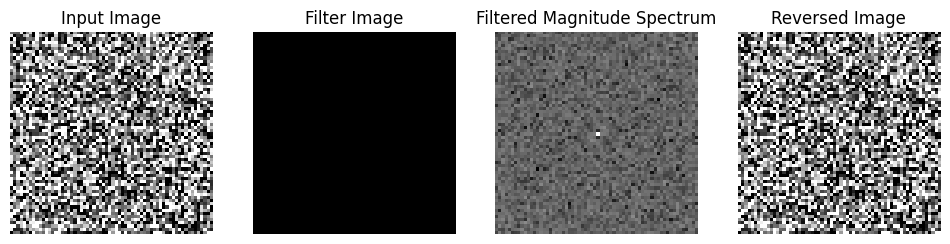

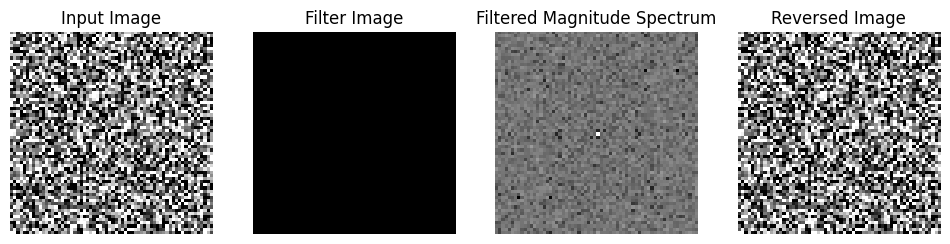

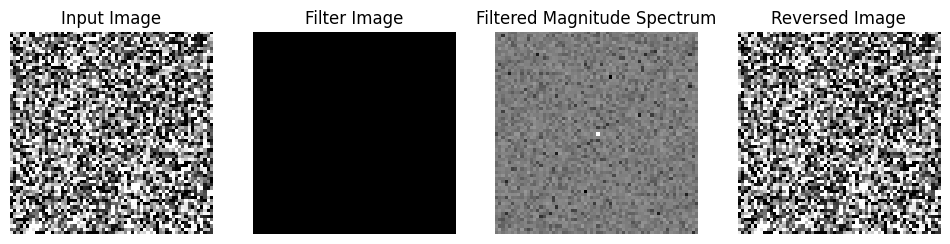

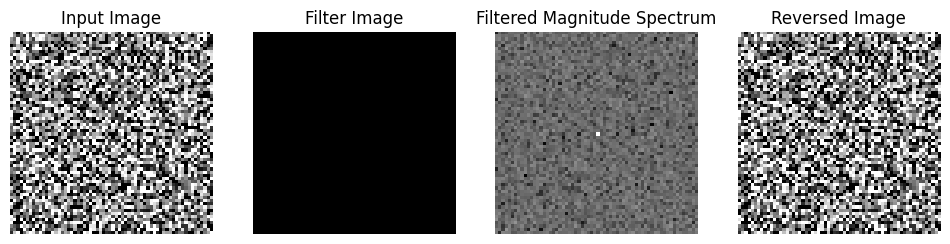

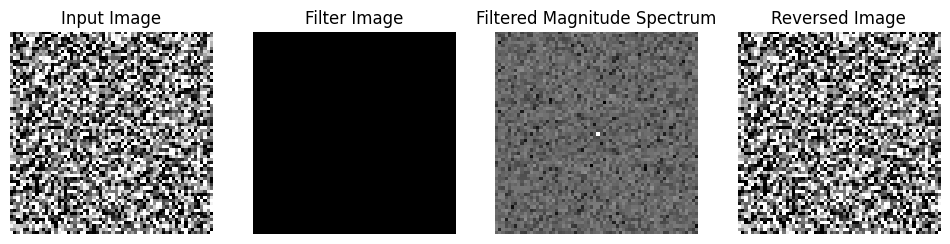

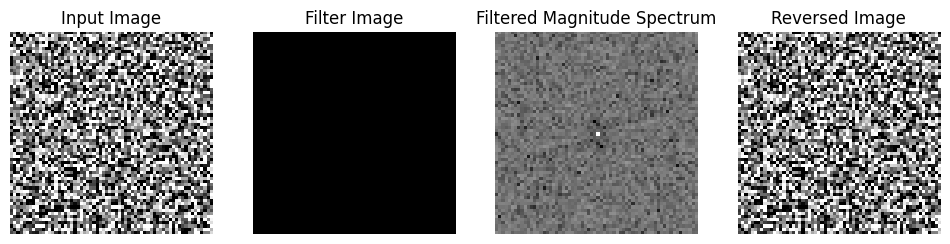

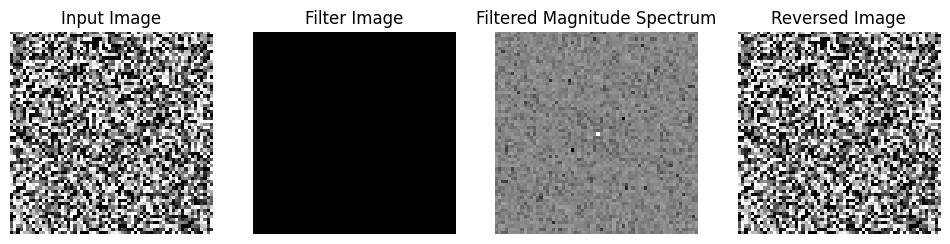

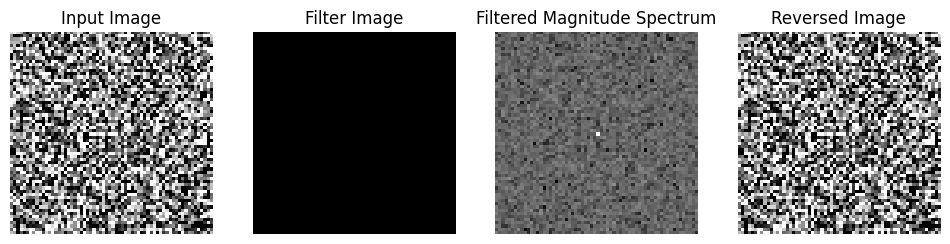

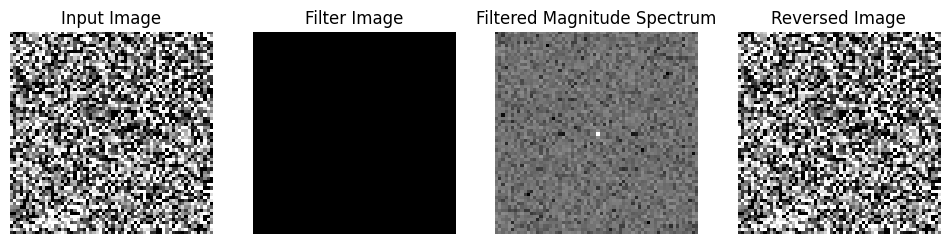

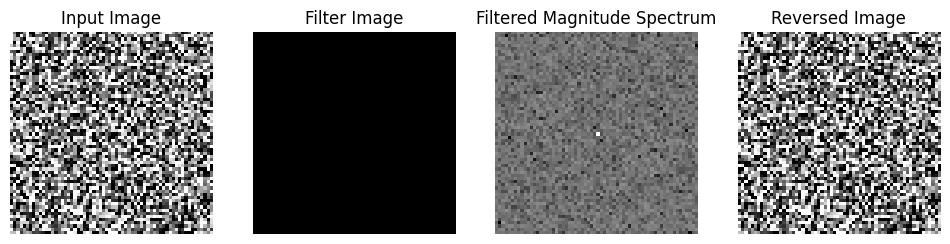

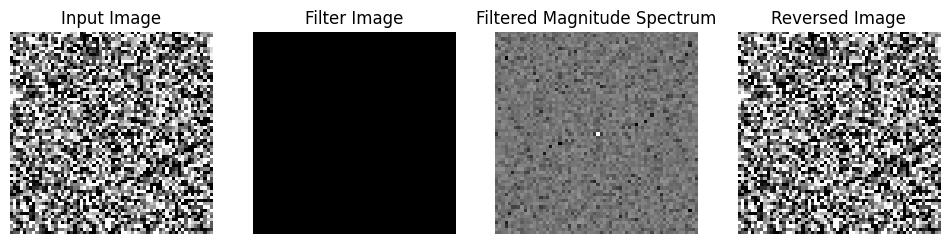

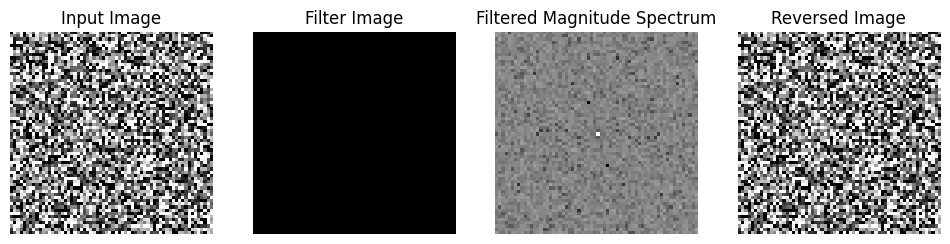

In [9]:
import os
from PIL import Image
from PIL import ImageDraw
import numpy as np
from matplotlib import pyplot as plt
import cv2
import glob

def main():
    # 画像を読み込む
    # img = Image.open('/home/tf63/project/nerf/diffusion/tutorial/Diffusion-Models-pytorch_simple/data/cifar10_64/cifar10-64/train/class0/img165.png')
    # グレイスケールに変換する
    # gray_img = img.convert('L')
    # NumPy 配列にする
    # f_xy = np.asarray(gray_img)

    # img = cv2.imread('data/cifar10_64/cifar10-64/train/class0/img165.png')
    img_dir = f'/home/tf63/project/nerf/diffusion/tutorial/Diffusion-Models-pytorch_simple/img/regenerate8_label0_to0_t999_cfg3'
    img_paths = glob.glob(f'{img_dir}/*_noise.png')
    # print('a')
    for img_path in img_paths:
        img_name = os.path.basename(img_path)
        img = cv2.imread(img_path)
        img = img.transpose(2, 0, 1)
        img = img[:, 2:66, 2:66]
        # img = img[:, 2:66, 68:132]
        print(img.shape)
        out = img.copy()
        for i in range(img.shape[0]):
            f_xy = img[i]

            # 2 次元高速フーリエ変換で周波数領域の情報を取り出す
            f_uv = np.fft.fft2(f_xy)
            # 画像の中心に低周波数の成分がくるように並べかえる
            shifted_f_uv = np.fft.fftshift(f_uv)

            # フィルタ (ローパス) を用意する
            x_pass_filter = Image.new(mode='L',  # 8-bit pixels, black and white
                                    size=(shifted_f_uv.shape[0],
                                            shifted_f_uv.shape[1]),
                                    color=0,  # default black
                                    )
            # 中心に円を描く
            draw = ImageDraw.Draw(x_pass_filter)
            # 円の半径
            ellipse_r = 64
            # 画像の中心
            center = (shifted_f_uv.shape[0] // 2,
                    shifted_f_uv.shape[1] // 2)
            # 円の座標
            ellipse_pos = (center[0] - ellipse_r,
                        center[1] - ellipse_r,
                        center[0] + ellipse_r,
                        center[1] + ellipse_r)
            draw.ellipse(ellipse_pos, fill=255)
            # フィルタ
            filter_array = np.asarray(x_pass_filter)

            # フィルタを適用する
            filtered_f_uv = np.multiply(shifted_f_uv, filter_array)

            # パワースペクトルに変換する
            magnitude_spectrum2d = 20 * np.log(np.absolute(filtered_f_uv))

            # 元の並びに直す
            unshifted_f_uv = np.fft.fftshift(filtered_f_uv)
            # 2 次元逆高速フーリエ変換で空間領域の情報に戻す
            i_f_xy = np.fft.ifft2(unshifted_f_uv).real  # 実数部だけ使う

            # 上記を画像として可視化する
            fig, axes = plt.subplots(1, 4, figsize=(12, 4))
            # 枠線と目盛りを消す
            for ax in axes:
                for spine in ax.spines.values():
                    spine.set_visible(False)
                ax.set_xticks([])
                ax.set_yticks([])
            # 元画像
            axes[0].imshow(f_xy, cmap='gray')
            axes[0].set_title('Input Image')
            # フィルタ画像
            axes[1].imshow(filter_array, cmap='gray')
            axes[1].set_title('Filter Image')
            # フィルタされた周波数領域のパワースペクトル
            axes[2].imshow(magnitude_spectrum2d, cmap='gray')
            axes[2].set_title('Filtered Magnitude Spectrum')
            # FFT -> Band-pass Filter -> IFFT した画像
            axes[3].imshow(i_f_xy, cmap='gray')
            axes[3].set_title('Reversed Image')
            # グラフを表示する
            # plt.show()
            plt.savefig(f'{os.path.splitext(img_name)[0]}_{i}.png')
            out[i] = ((i_f_xy / i_f_xy.max()) * 255).astype(np.uint8)

        out = out.transpose(1, 2, 0)
        # print(out.shape, img.shape)
        
        out = np.concatenate([out, img.transpose(1, 2, 0)], axis=1)
        # print(out.shape)
        cv2.imwrite(img_name, out)

main()

In [7]:
def make_gif(path, n):
    imgs_name = glob.glob(os.path.join(path, f'???_noise_{n}.png'))
    imgs_name = sorted(imgs_name)
    imgs = list()
    for i in range(len(imgs_name)):
        imgs.append(Image.open(imgs_name[i]))
        imgs[i] = imgs[i].resize((imgs[i].width, imgs[i].height))
        duration = [50] * len(imgs_name)
        duration[-1] = 1000
        imgs[0].save(os.path.join(os.path.dirname(path), f'{os.path.basename(path)}_{n}.gif'), save_all=True, loop=0, duration=duration,
                     append_images=imgs[1:],)


for i in [0, 1, 2]:
    make_gif('/home/tf63/project/nerf/diffusion/tutorial/Diffusion-Models-pytorch_simple/tmp/no_cut_t999_noise', n=i)
